#### Obs: Esse código vai gerar um arquivo de modelo treinado pelo Tensorflow 
#### Obs: Para compilar esse código é necessário que as imagens estejam mesma pasta dele

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from PIL import Image


### 1º Carregamos as imagens, simplificamos os canais de cores, redimensionamos e normalizamos elas

In [2]:
imagens_array = []
imagens_array_teste = []
tam = 200
for i in range (5000):
    nome_arquivo = f'meu_grafico_{i}.jpg'
    imagem = cv2.imread(nome_arquivo,cv2.IMREAD_GRAYSCALE)   #Carregando a imagem
    imagem = cv2.resize(imagem, (tam, tam),interpolation = cv2.INTER_AREA) #Redimensionamento da imagem
    matriz_imagem = np.array(imagem)  
    imagens_array.append(matriz_imagem)

for i in range (1000):
    nome_arquivo = f'meu_grafico_{i+5000}.jpg'
    imagem = cv2.imread(nome_arquivo,cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (tam, tam),interpolation = cv2.INTER_AREA)
    matriz_imagem = np.array(imagem)
    imagens_array_teste.append(matriz_imagem)
        


In [3]:
imagens_array=np.array(imagens_array)
print(imagens_array.shape)
imagens_array_teste=np.array(imagens_array_teste)
print(imagens_array_teste.shape)

(5000, 200, 200)
(1000, 200, 200)


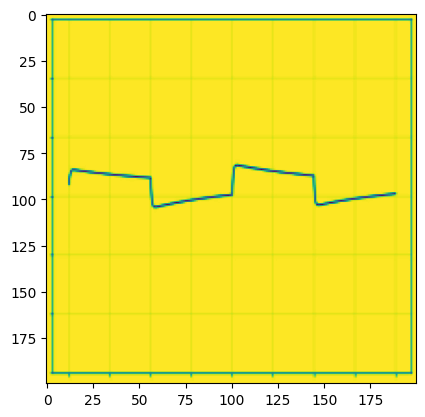

In [4]:
plt.figure()

plt.imshow(imagens_array_teste[200,:,:])
plt.grid(False)
plt.show()

In [5]:
imagens_array=imagens_array/255  #Normalização dos dados
imagens_array_teste=imagens_array_teste/255

### 2º Criamos nossa arquitetura de rede neural e realizamos o treinamento

In [6]:
import tensorflow as tf 
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten


#Esse é a arquitetura da nossa rede neural:
model_2 = Sequential ([
    Conv2D(64, (3,3), activation='relu', input_shape=(tam,tam,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu'),
    Dense (units=3, activation='relu')
    
])


from tensorflow.keras.losses import MeanSquaredError 

model_2.compile (optimizer=tf.keras.optimizers.Adam(learning_rate=0.00006),
loss=MeanSquaredError(), 
metrics=['accuracy']) 



C:\Users\ygorp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
conjunto_treinamento=np.load("conjunto_treinamento.npy")
conjunto_teste=np.load("conjunto_teste.npy")
conjunto_completo = np.vstack((conjunto_treinamento,conjunto_teste))
print(conjunto_treinamento.shape)
print(conjunto_teste.shape)
print(conjunto_completo.shape)

(5000, 3)
(1000, 3)
(6000, 3)


In [ ]:
x = np.max(conjunto_completo, axis=0)
print(x)


maximos=x
conjunto_treinamento_normalizado = conjunto_treinamento / x
conjunto_teste_normalizado = conjunto_teste/x

print(conjunto_treinamento_normalizado)

In [ ]:
#fazer com 7 epocs
history=model_2.fit(imagens_array,conjunto_treinamento_normalizado,epochs=30,validation_data=(imagens_array_teste, conjunto_teste_normalizado))

### 3º Avaliamos o modelo treinado no conjunto de teste

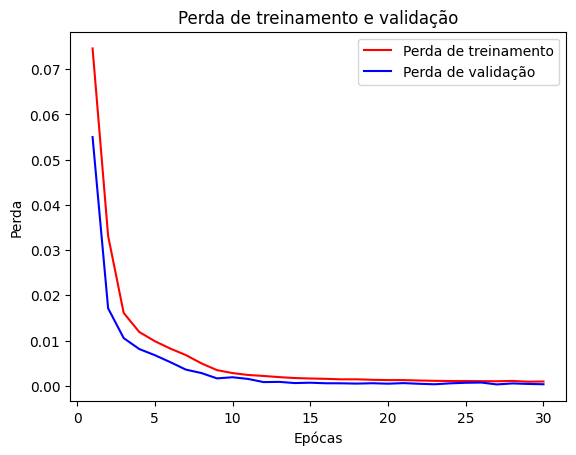

In [10]:
import pickle

# Salvar o objeto history em um arquivo
with open('historico_200', 'wb') as file:
    pickle.dump(history.history, file)

history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Perda de treinamento')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Perda de validação')
plt.title('Perda de treinamento e validação')
plt.xlabel('Epócas')
plt.ylabel('Perda')
plt.legend()

plt.show()

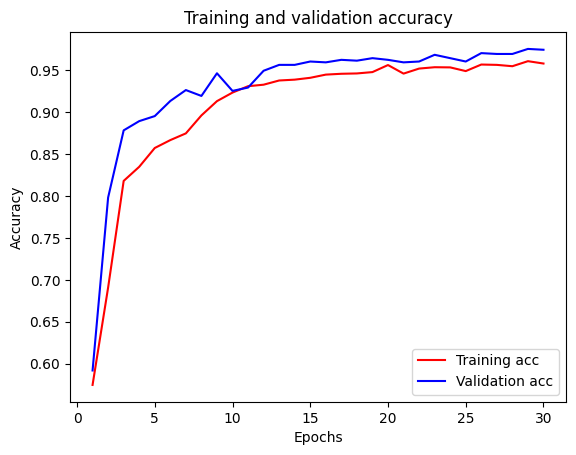

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - accuracy: 0.1252 - loss: 15.7090
16.536327362060547
0.12300000339746475


In [11]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


loss, accuracy = model_2.evaluate(imagens_array_teste, conjunto_teste)
print(loss)
print(accuracy)

In [ ]:
y_3=model_2.predict(imagens_array_teste)
np.set_printoptions(threshold=np.inf)
y_real = y_3*maximos
print(y_real)



In [ ]:
print(conjunto_teste)

In [14]:
#model_2.save('rede_treinada')

## 4º A seguir iremos ver os 30 primeiros gráficos gerados pelo conjunto original em comparação com o conjunto que o modelo previu.

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  4 21:21:44 2020

@author: Edson Porto da Silva
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from matplotlib.lines import Line2D  # Importe a classe Line2D

def simulador(R,L,C,r,l,c,a):

    # Resolução numérica de um circuito RLC série alimentado por uma onda quadrada
    # de tensão.
    # parâmetros do circuito:
    V0 = 0                # tensão inicial no capacitor [volts]
    I0 = 0                # corrente inicial no indutor [ampères]
    fq = 1               # frequência da onda quadrada [hertz]
    Vq = 15               # amplitude da onda quadrada [volts]
    w0 = 1/np.sqrt(L*C)   # frequência angular de ressonância [rad/segundo]

    t = np.arange(0,10,0.0001)*(2/10)   # discretização do intervalo de tempo [segundos]
    Vs = Vq*signal.square(2*np.pi*fq*t) # onda quadrada na entrada do circuito

    vC    = np.zeros(len(t))
    x     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC[0] = V0       # condição incial de vc
    x[0]  = I0/C     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC[kk+1] = vC[kk]+x[kk]*deltaT                                # calcula vc(t+deltaT)
        x[kk+1]  = x[kk]+(-R/L*x[kk]-1/(L*C)*(vC[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i  = np.append(I0, C*np.diff(vC)/deltaT)    # corrente no circuito

    vR = R*i                                    # tensão no resistor
    vL = Vs-vR-vC                               # tensão no indutor(LKT)

    ###--------------------------------------------------------------###

    vC1    = np.zeros(len(t))
    x1     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC1[0] = V0       # condição incial de vc
    x1[0]  = I0/c     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC1[kk+1] = vC1[kk]+x1[kk]*deltaT                                # calcula vc(t+deltaT)
        x1[kk+1]  = x1[kk]+(-r/l*x1[kk]-1/(l*c)*(vC1[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i1  = np.append(I0, c*np.diff(vC1)/deltaT)    # corrente no circuito

    vR1 = r*i1                                    # tensão no resistor
    vL1 = Vs-vR1-vC1                               # tensão no indutor(LKT)



    if a ==1:
        resist1 = f"{R:.5f}"
        indut1 = f"{L:.5f}"
        cap1 = f"{C:.5f}"

        resist2 = f"{r:.5f}"
        indut2 = f"{l:.5f}"
        cap2 = f"{c:.5f}"


        plt.figure(1, figsize=(14, 8), dpi=100, facecolor='w', edgecolor='k')
        plt.subplot(1, 2, 1)
        plt.plot(t, i,color="black" )
        #plt.legend(['corrente i(t)']);
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.ylabel('Corrente Elétrica (A)', fontsize = 12)
        plt.xlabel('Tempo (s)', fontsize = 12)
        plt.title('Gráfico com os parâmetros reais', fontsize = 12)
        custom_legend = {
    'Resistência: '+resist1: Line2D([0], [0], marker='o', color='none', markerfacecolor='blue', markersize=5),
    'Indutância: '+indut1: Line2D([0], [0], marker='o', color='none', markerfacecolor='gray', markersize=5),
    'Capacitância: '+cap1: Line2D([0], [0], marker='o', color='none', markerfacecolor='brown', markersize=5),
}
        plt.legend(custom_legend.values(), custom_legend.keys(), loc='upper right')





        plt.subplot(1, 2, 2)
        plt.plot(t, i1,color="black")
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.ylabel('Corrente Elétrica (A)', fontsize = 12)
        plt.xlabel('Tempo (s)', fontsize = 12)
        plt.title('Gráfico com os parâmetros da rede', fontsize = 12)
        custom_legend = {
    'Resistência: '+resist2: Line2D([0], [0], marker='o', color='none', markerfacecolor='blue', markersize=5),
    'Indutância: '+indut2: Line2D([0], [0], marker='o', color='none', markerfacecolor='gray', markersize=5),
    'Capacitância: '+cap2: Line2D([0], [0], marker='o', color='none', markerfacecolor='brown', markersize=5),
}
        plt.legend(custom_legend.values(), custom_legend.keys(), loc='upper right')

        plt.tight_layout()

        plt.show(block=False)



Figura: 0


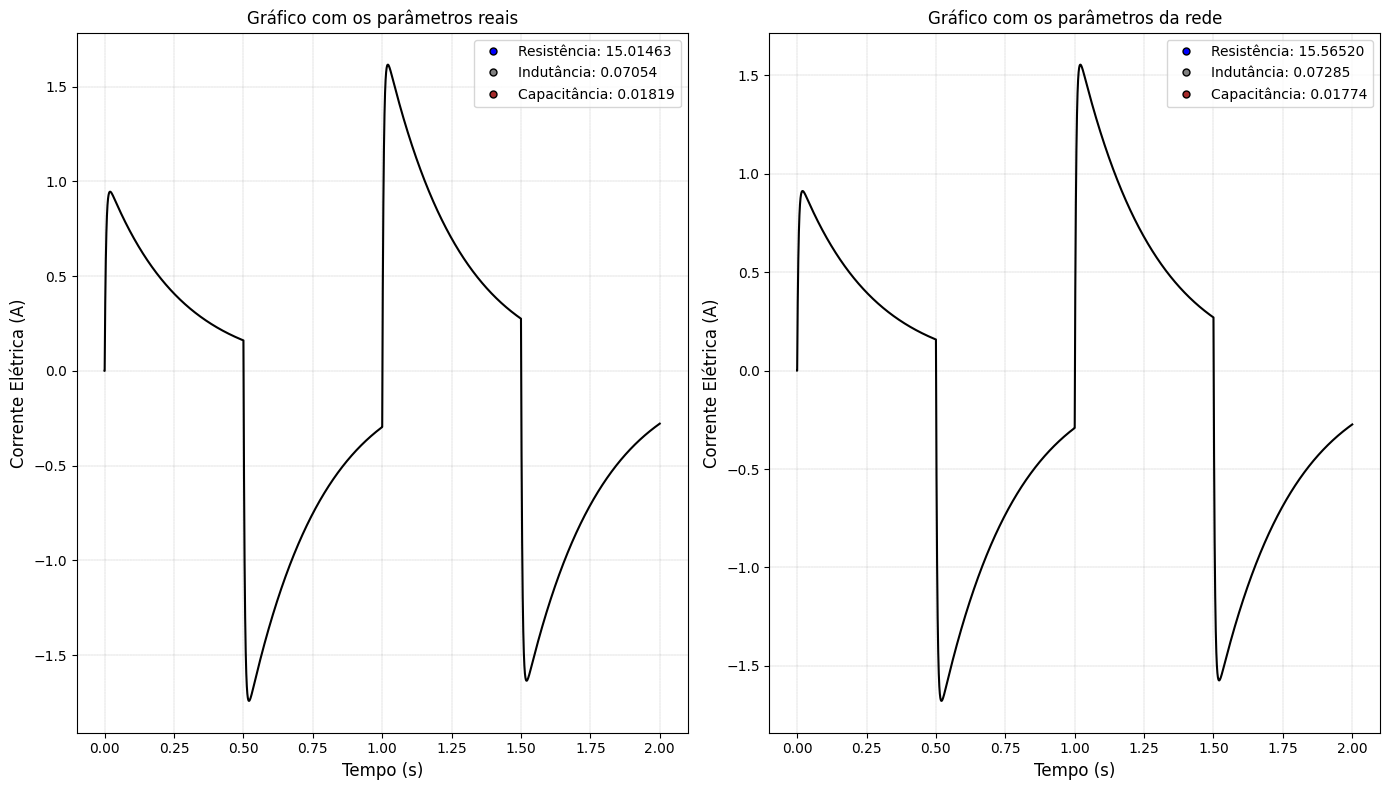

Figura: 1


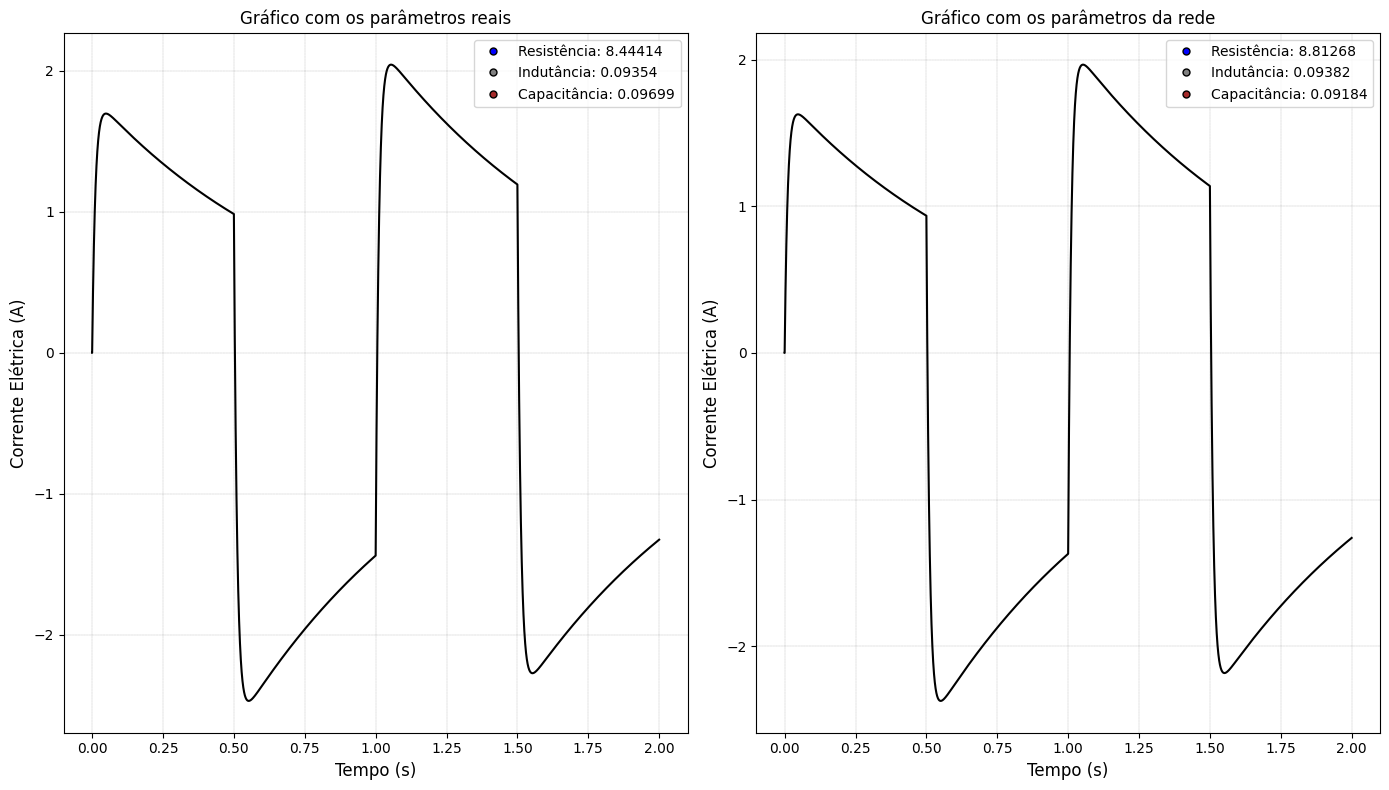

Figura: 2


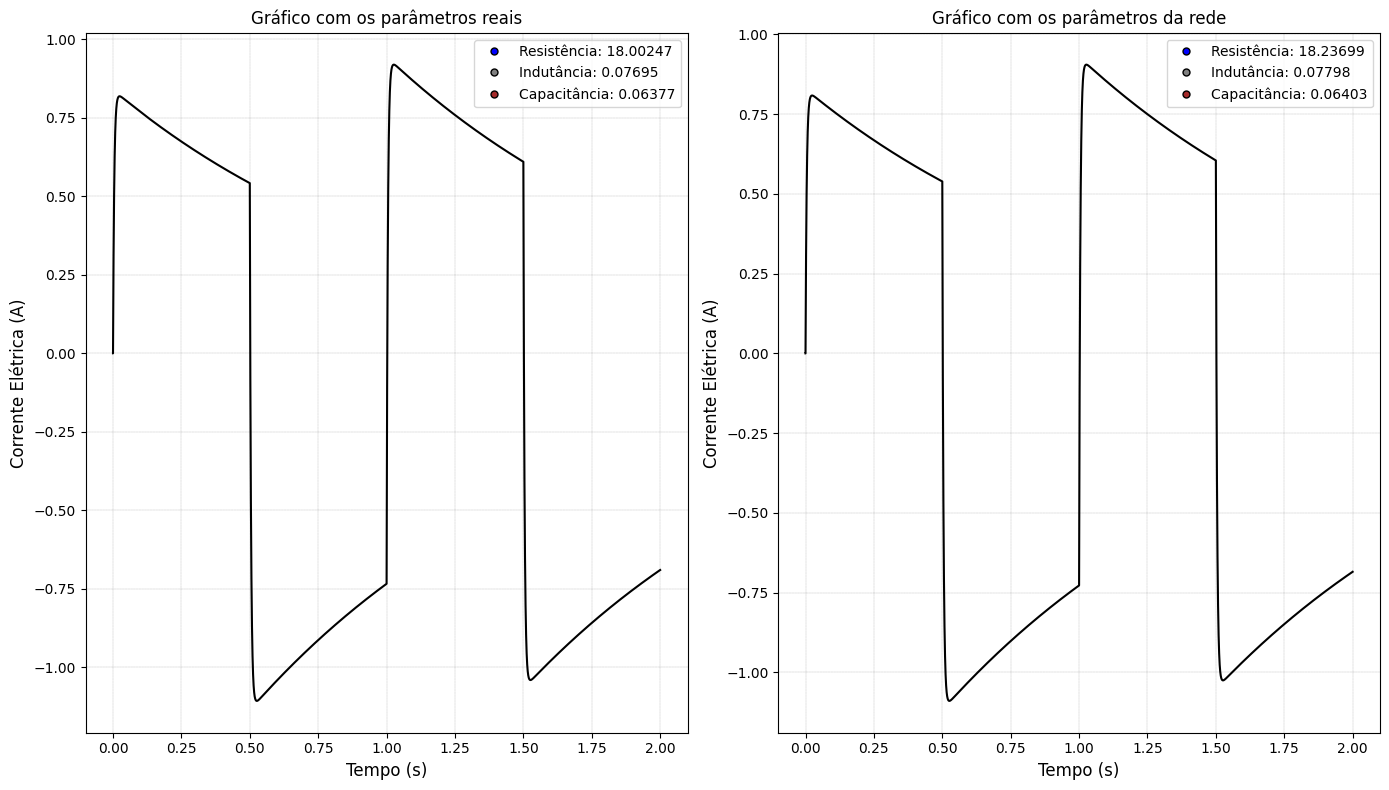

Figura: 3


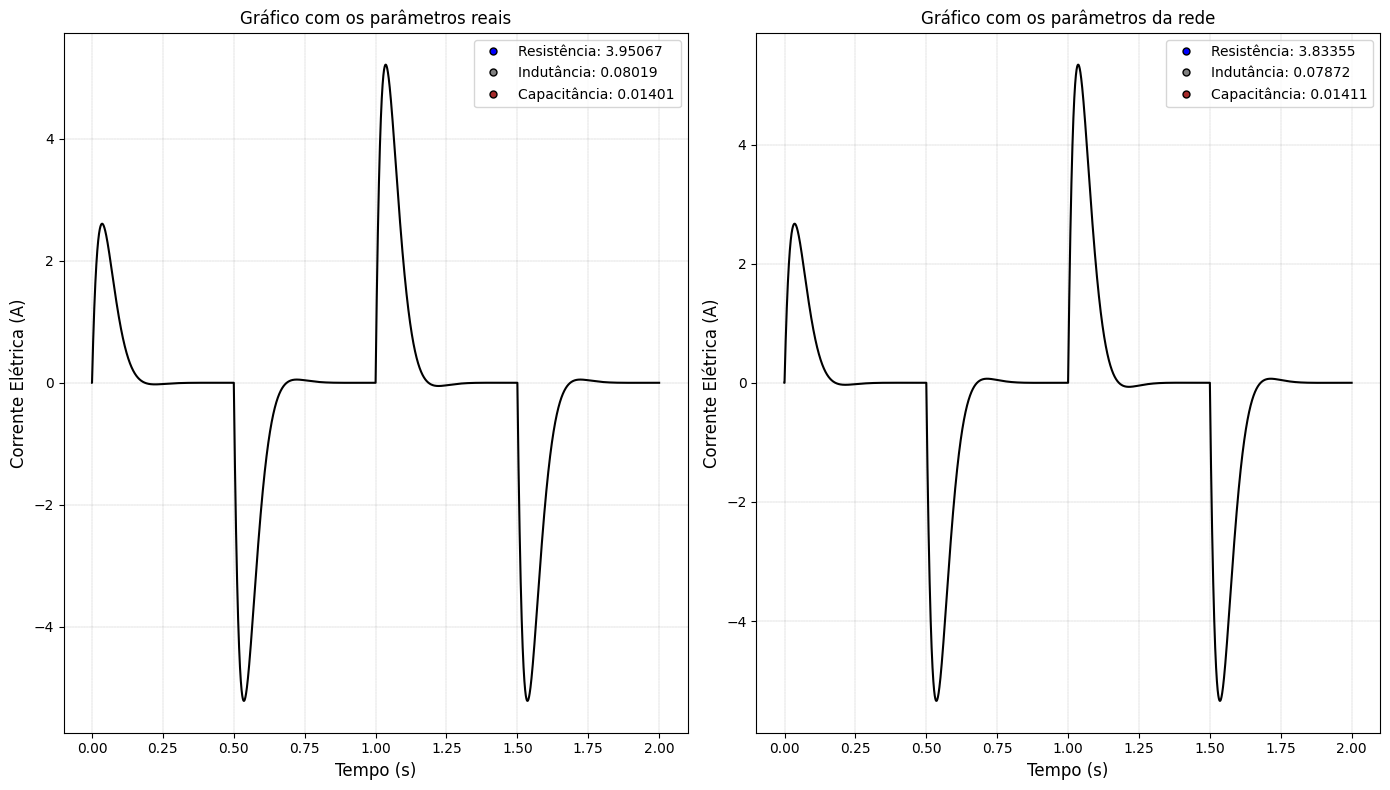

Figura: 4


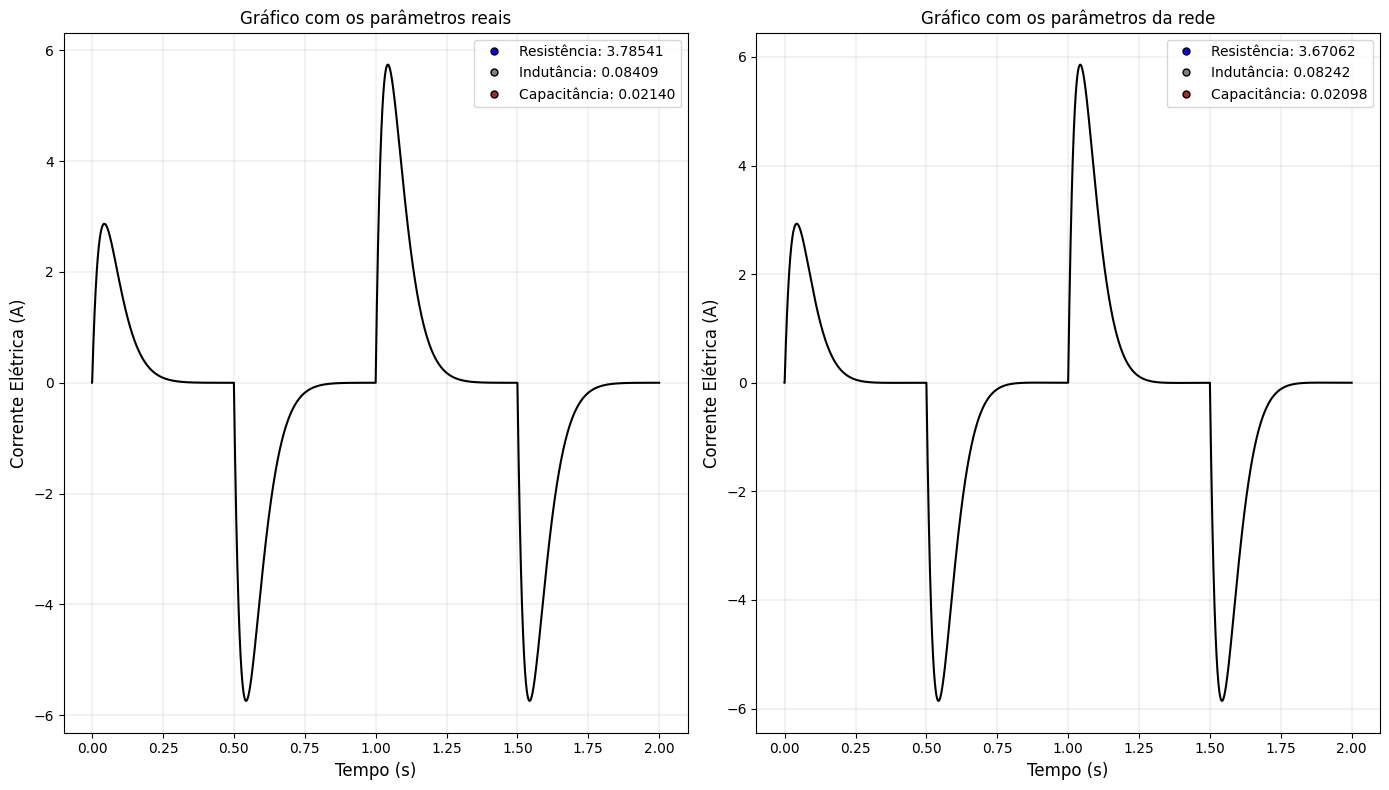

Figura: 5


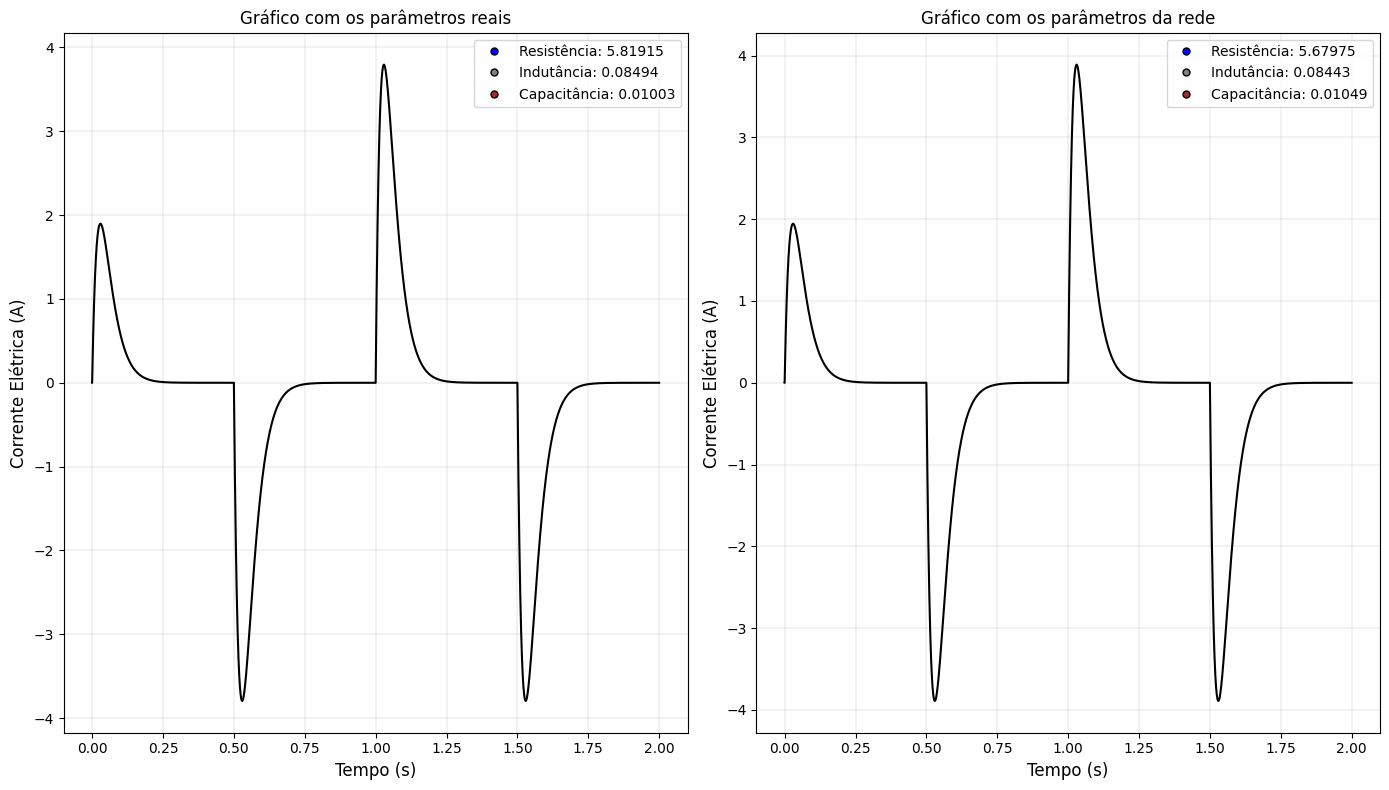

Figura: 6


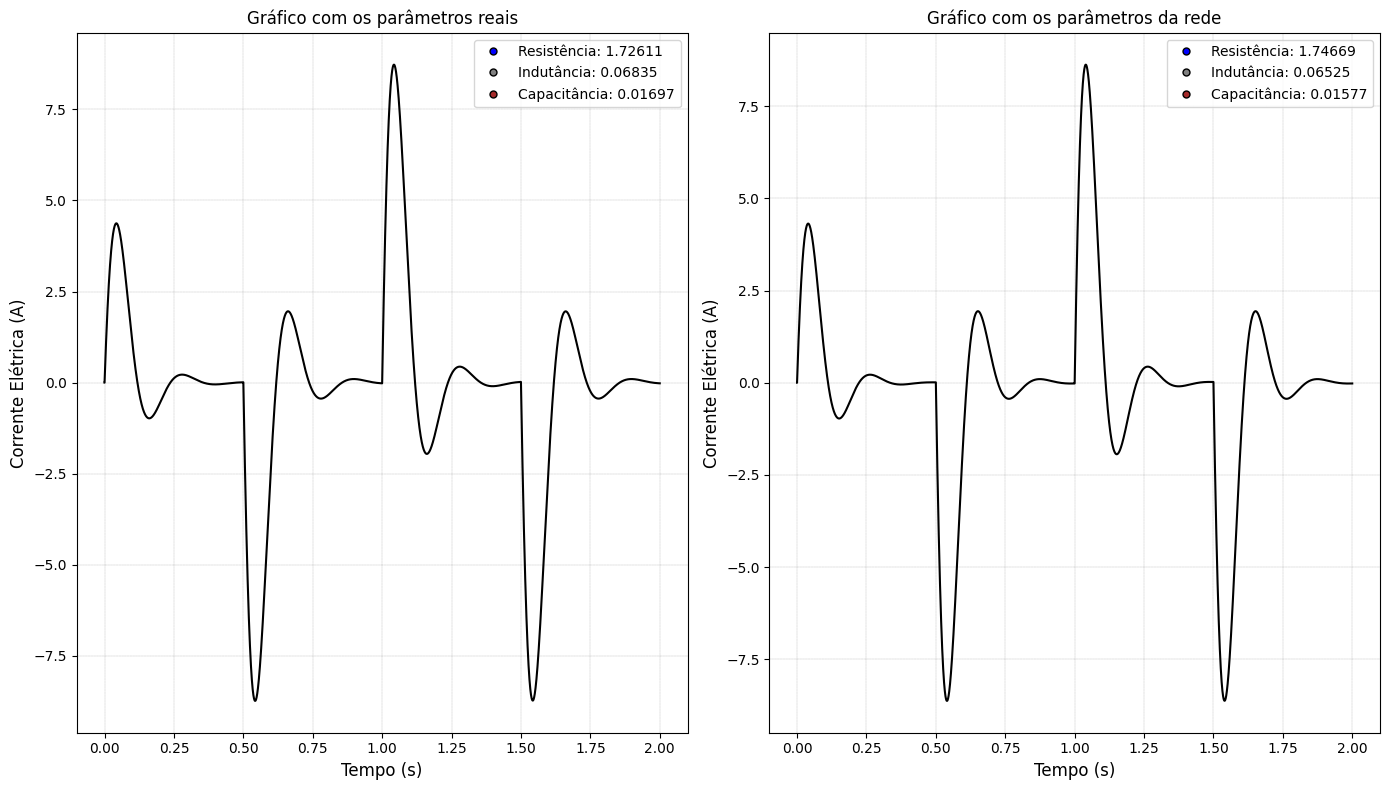

Figura: 7


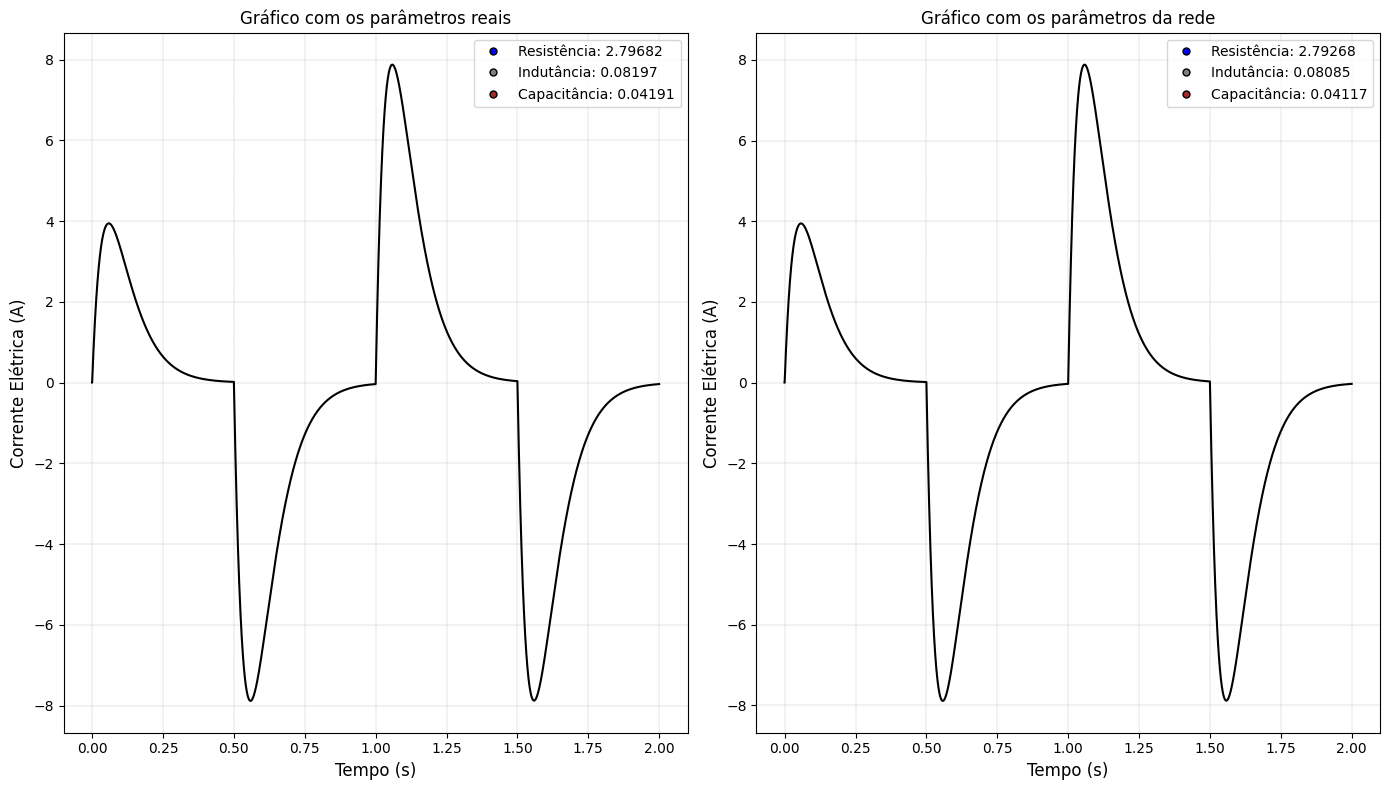

Figura: 8


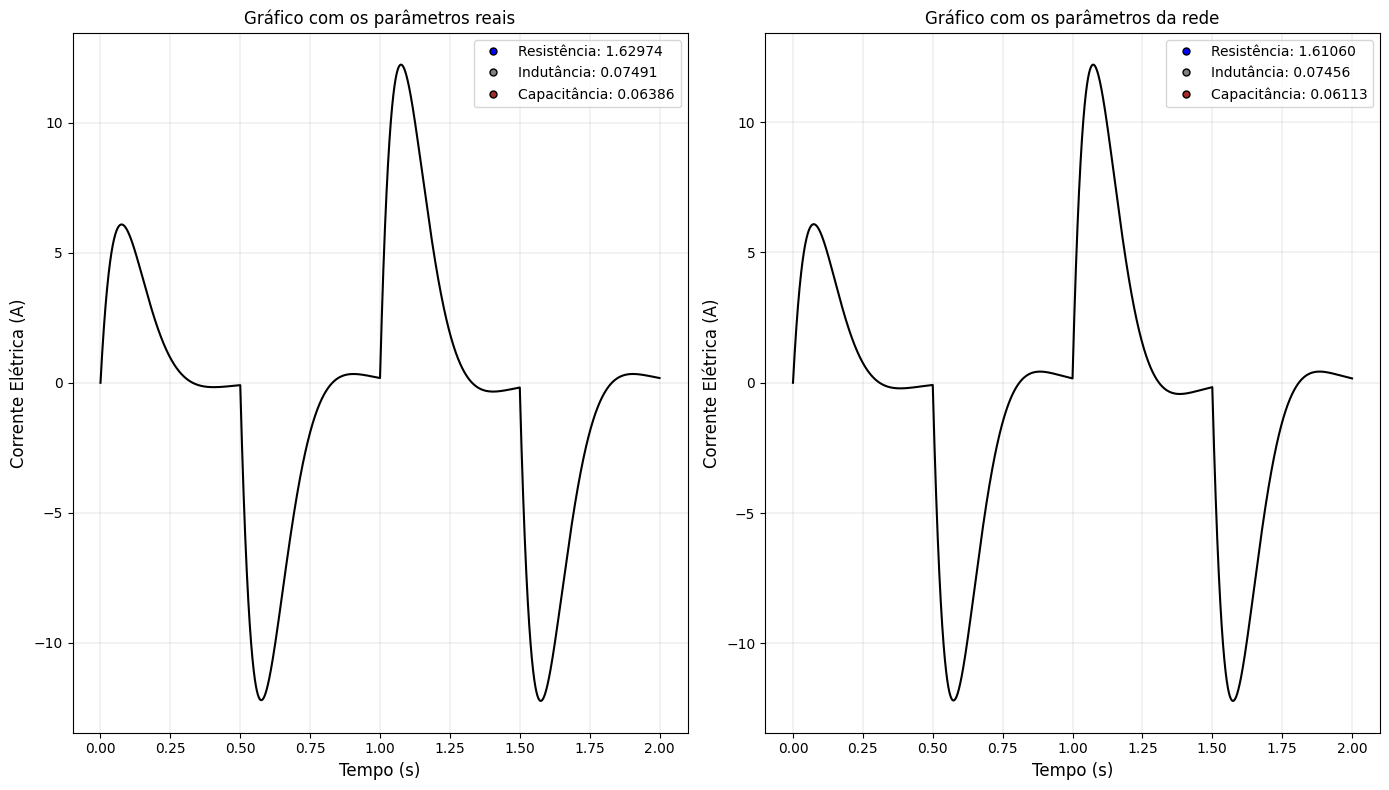

Figura: 9


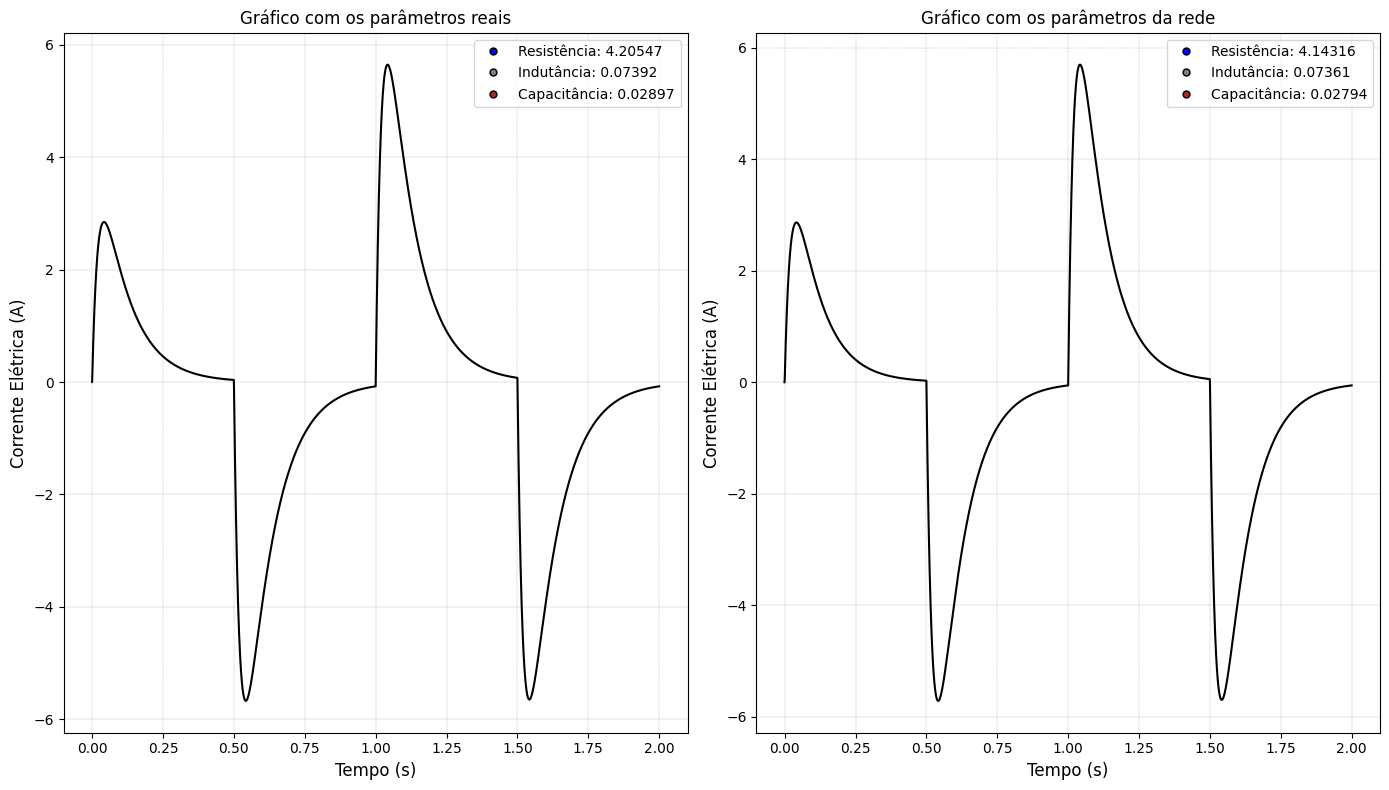

Figura: 10


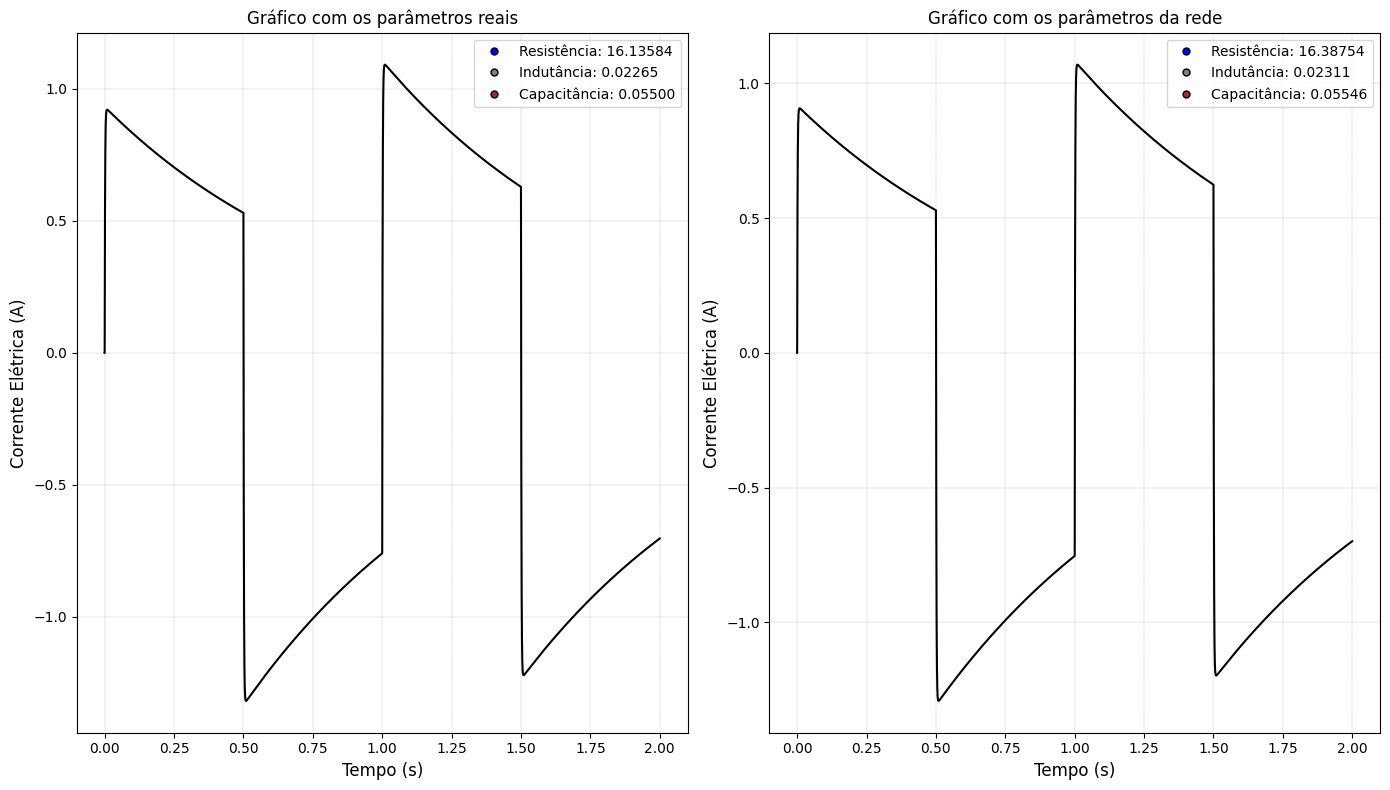

Figura: 11


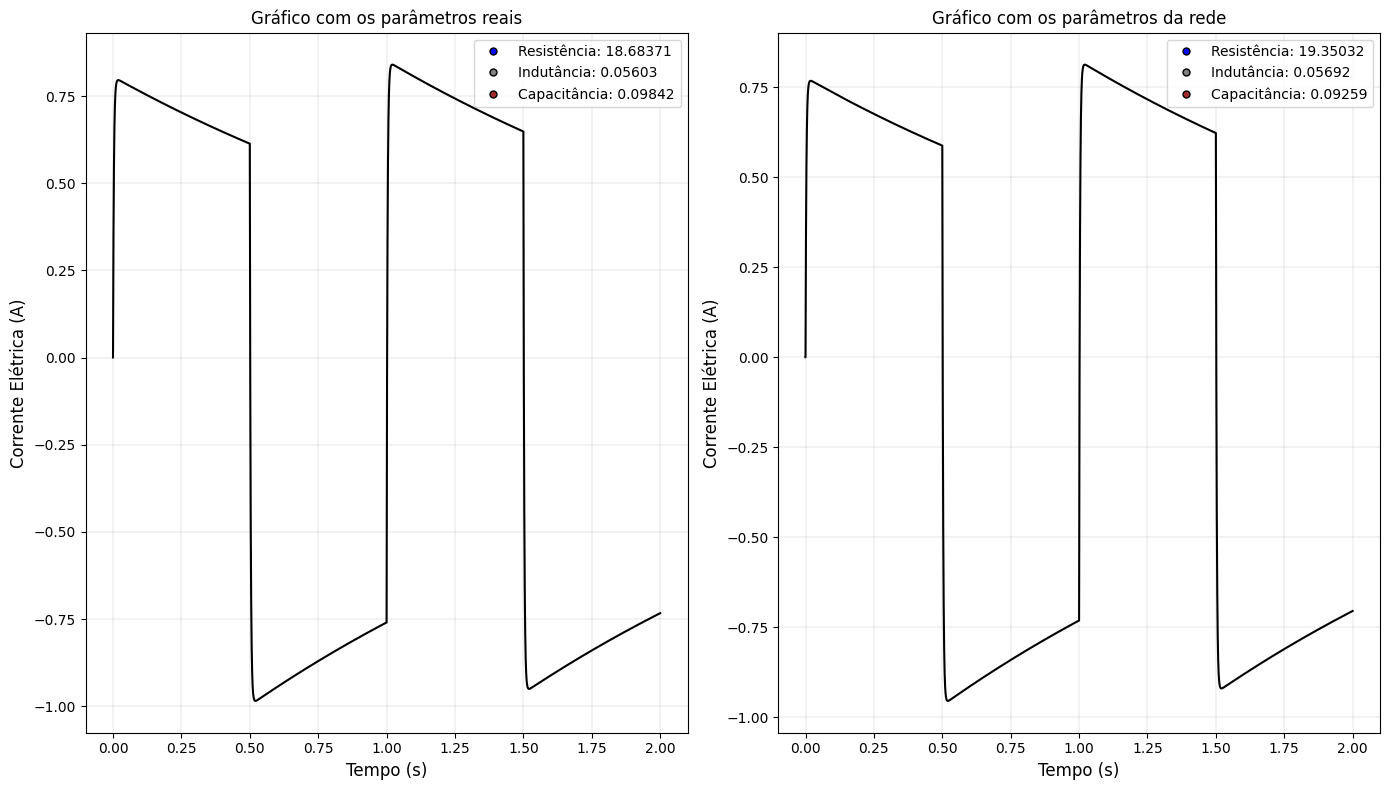

Figura: 12


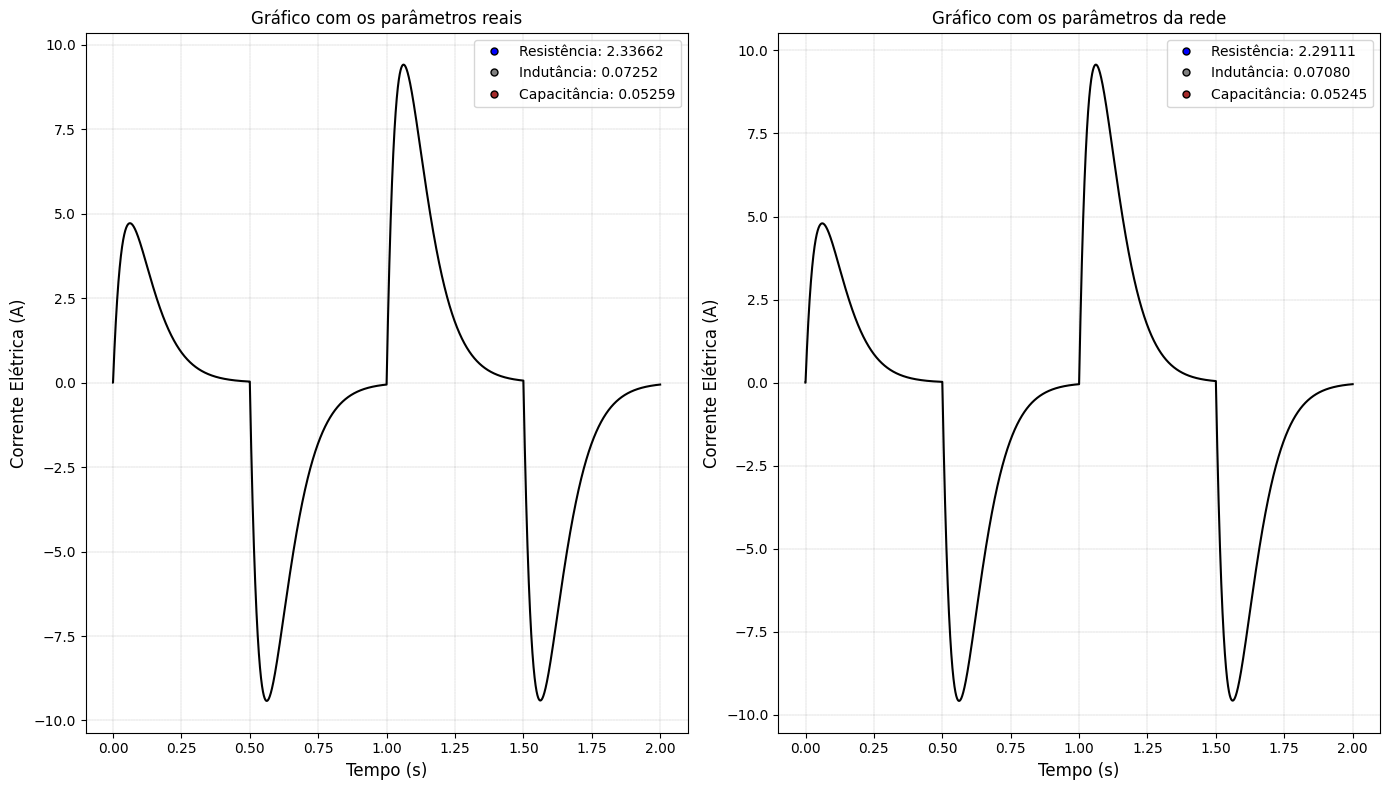

Figura: 13


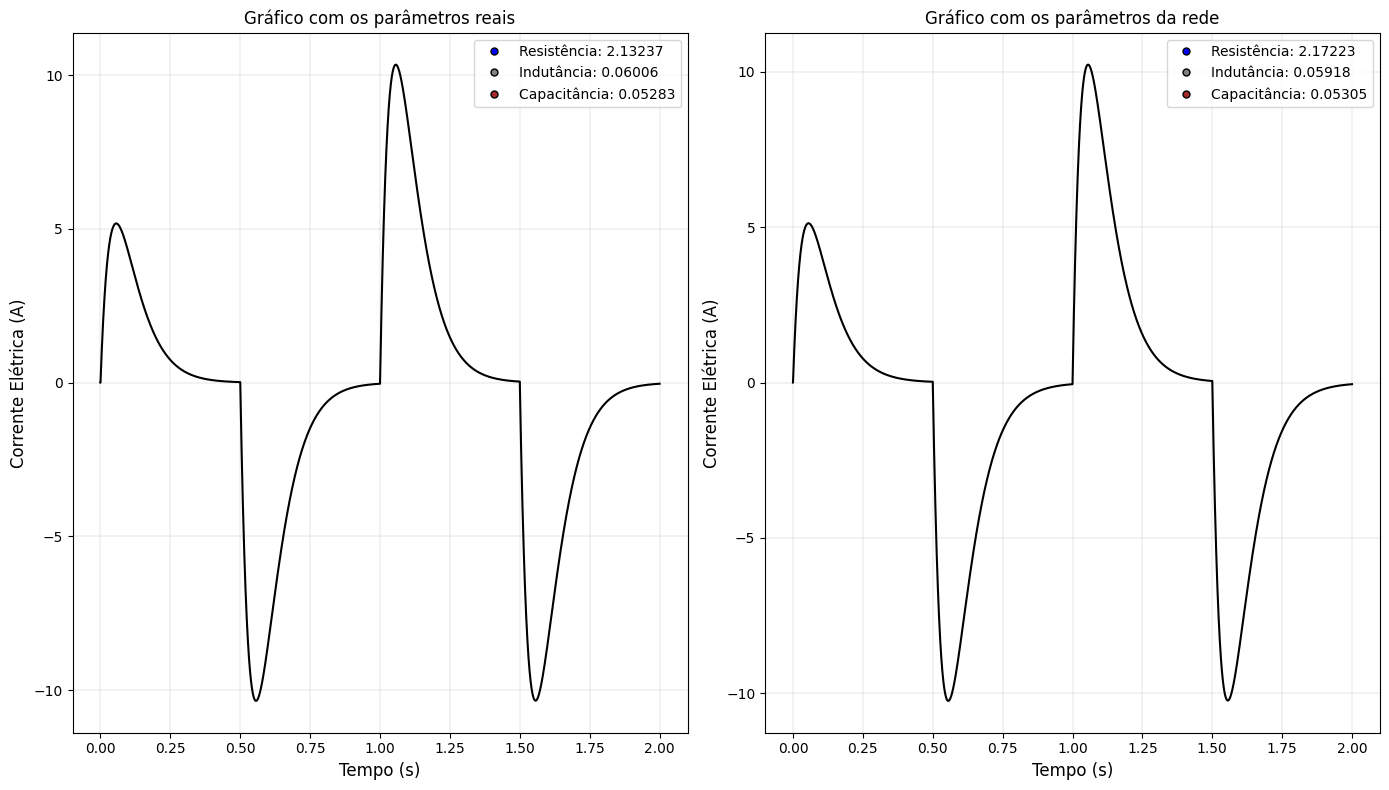

Figura: 14


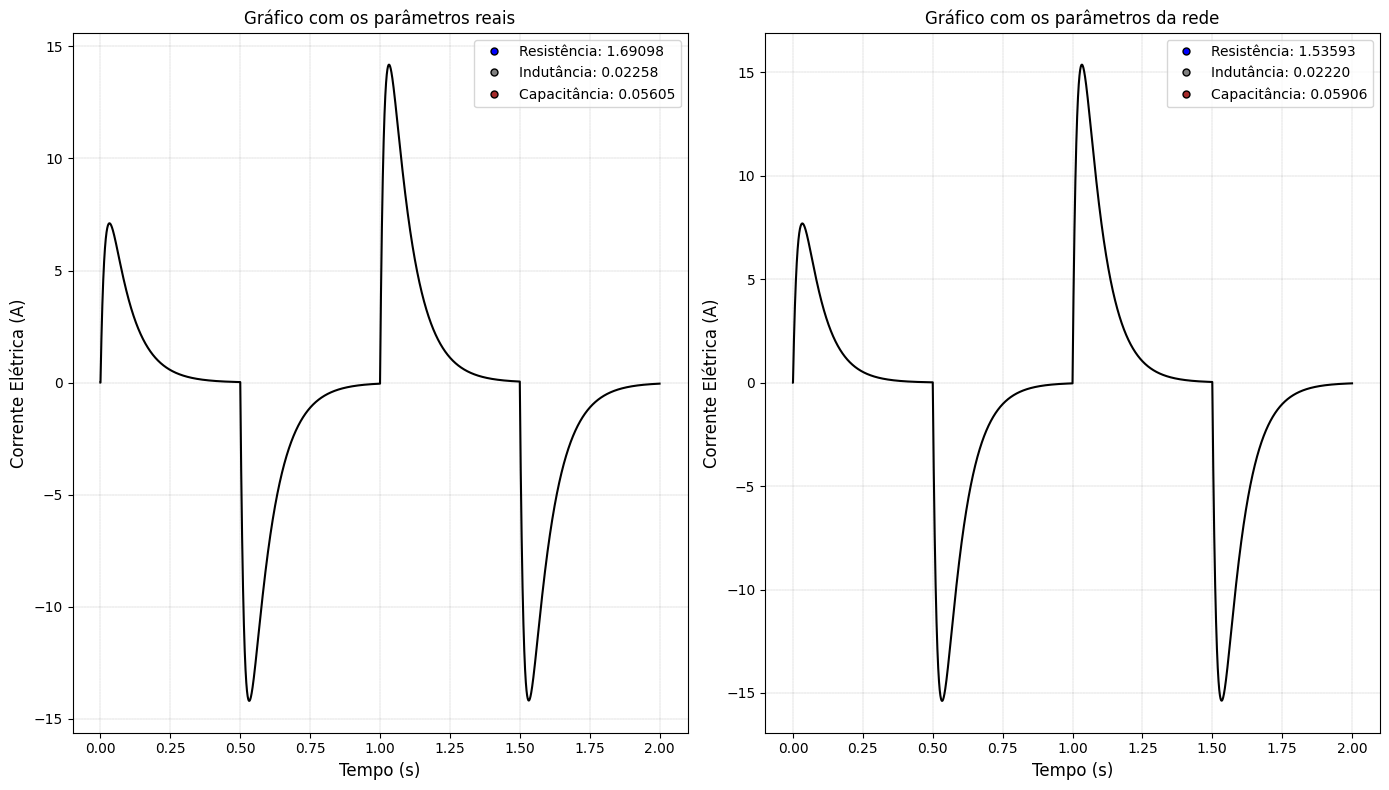

Figura: 15


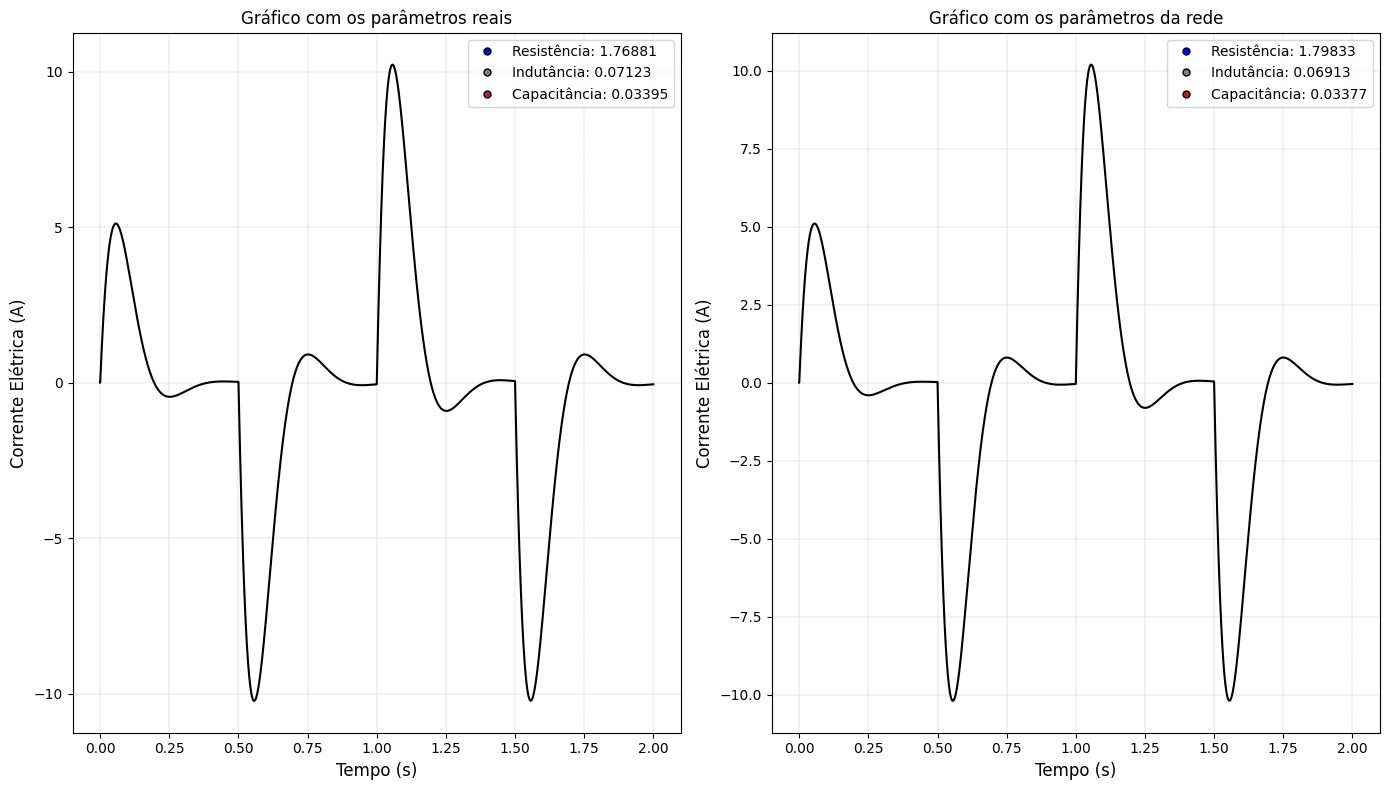

Figura: 16


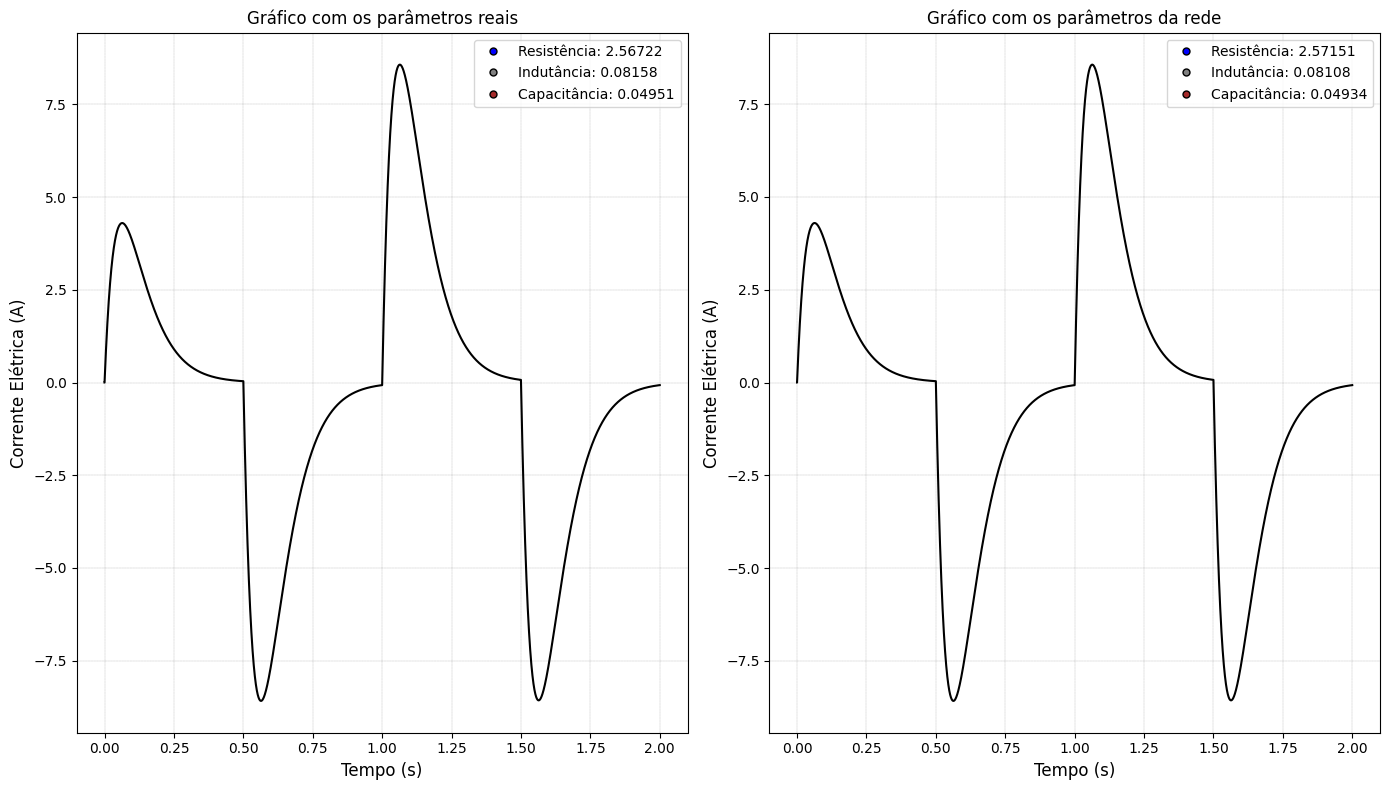

Figura: 17


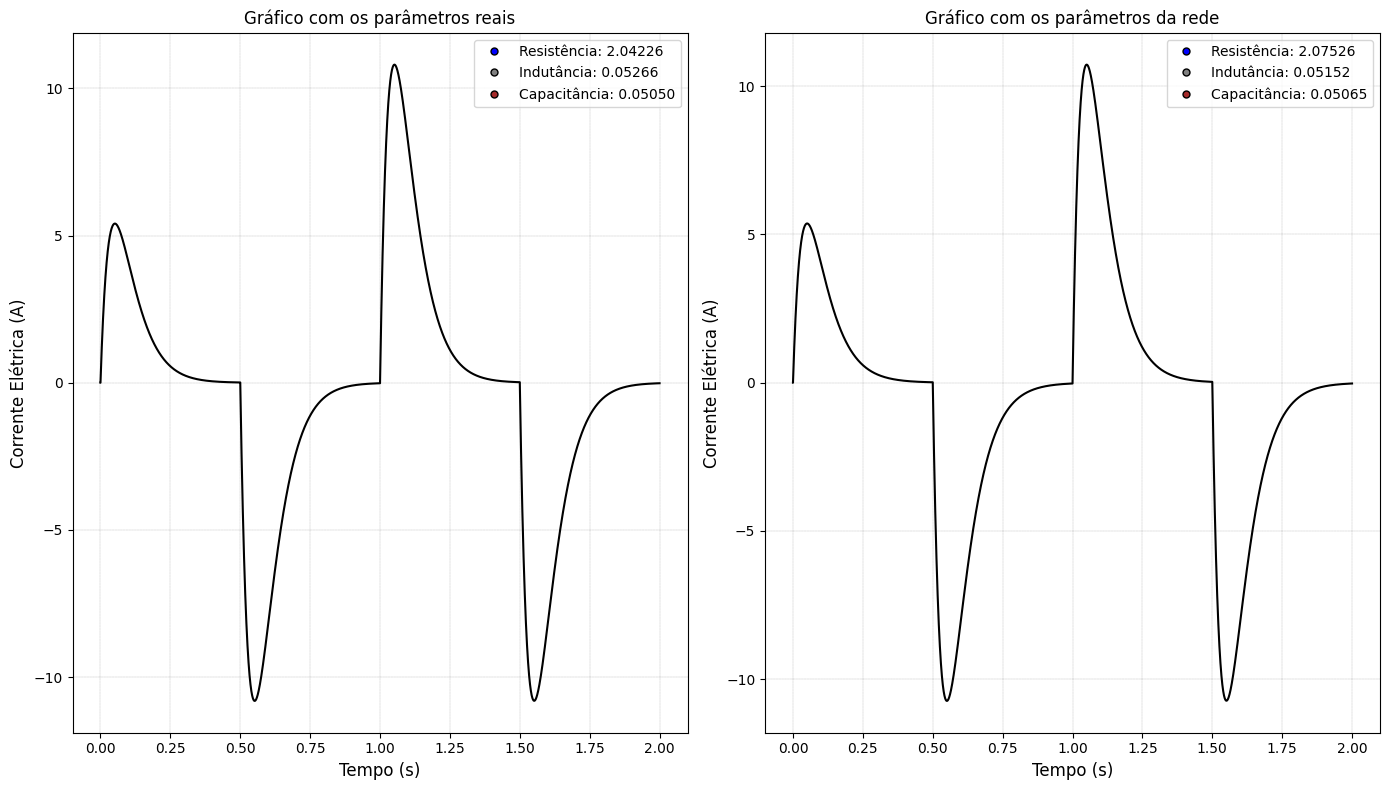

Figura: 18


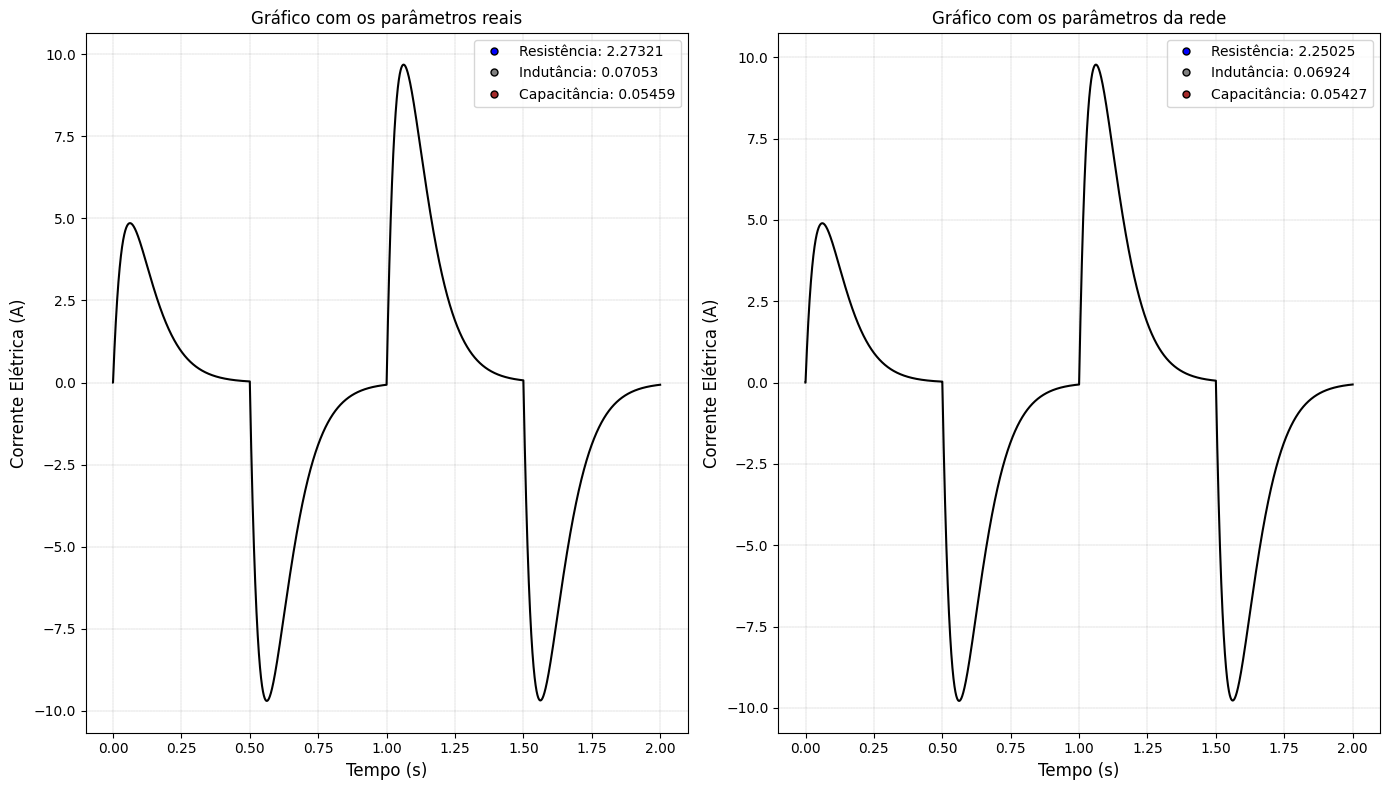

Figura: 19


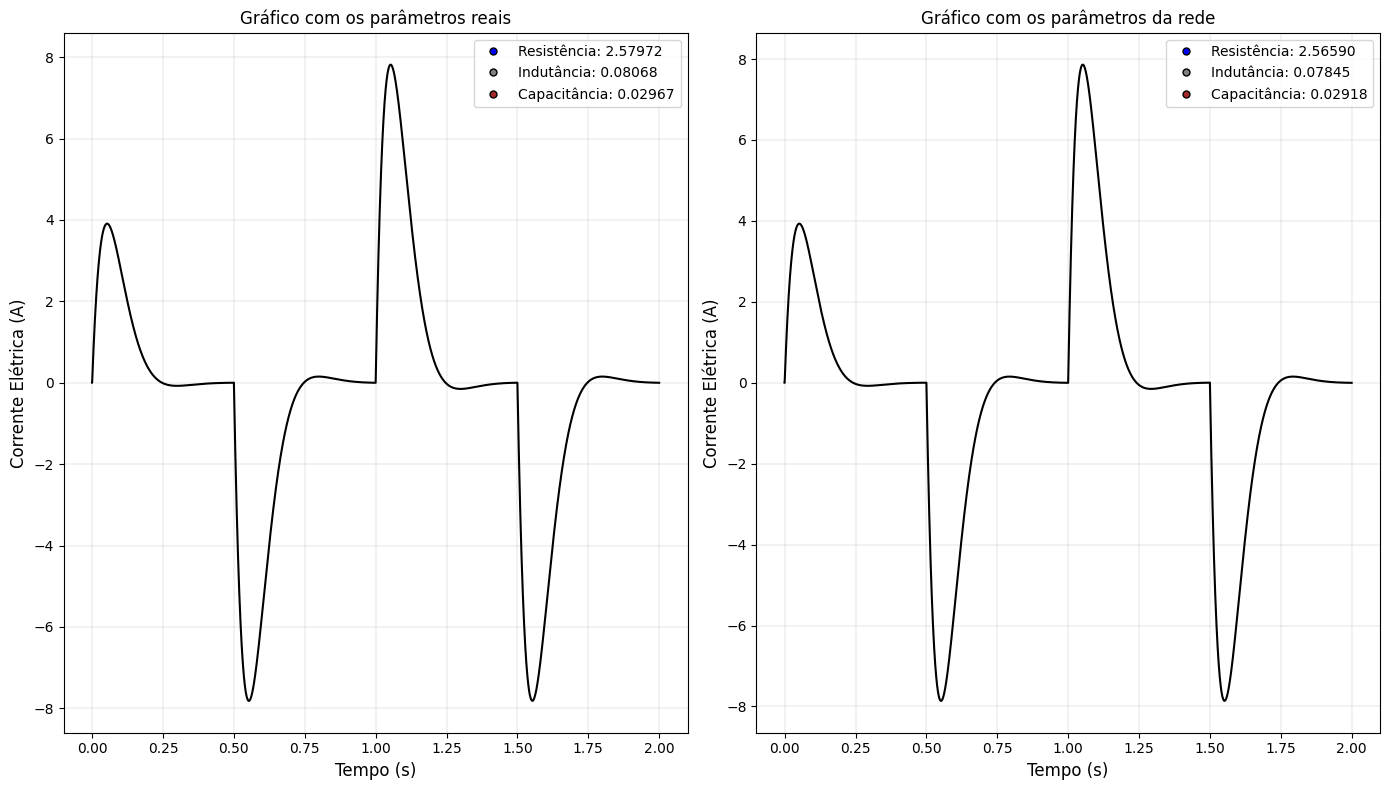

Figura: 20


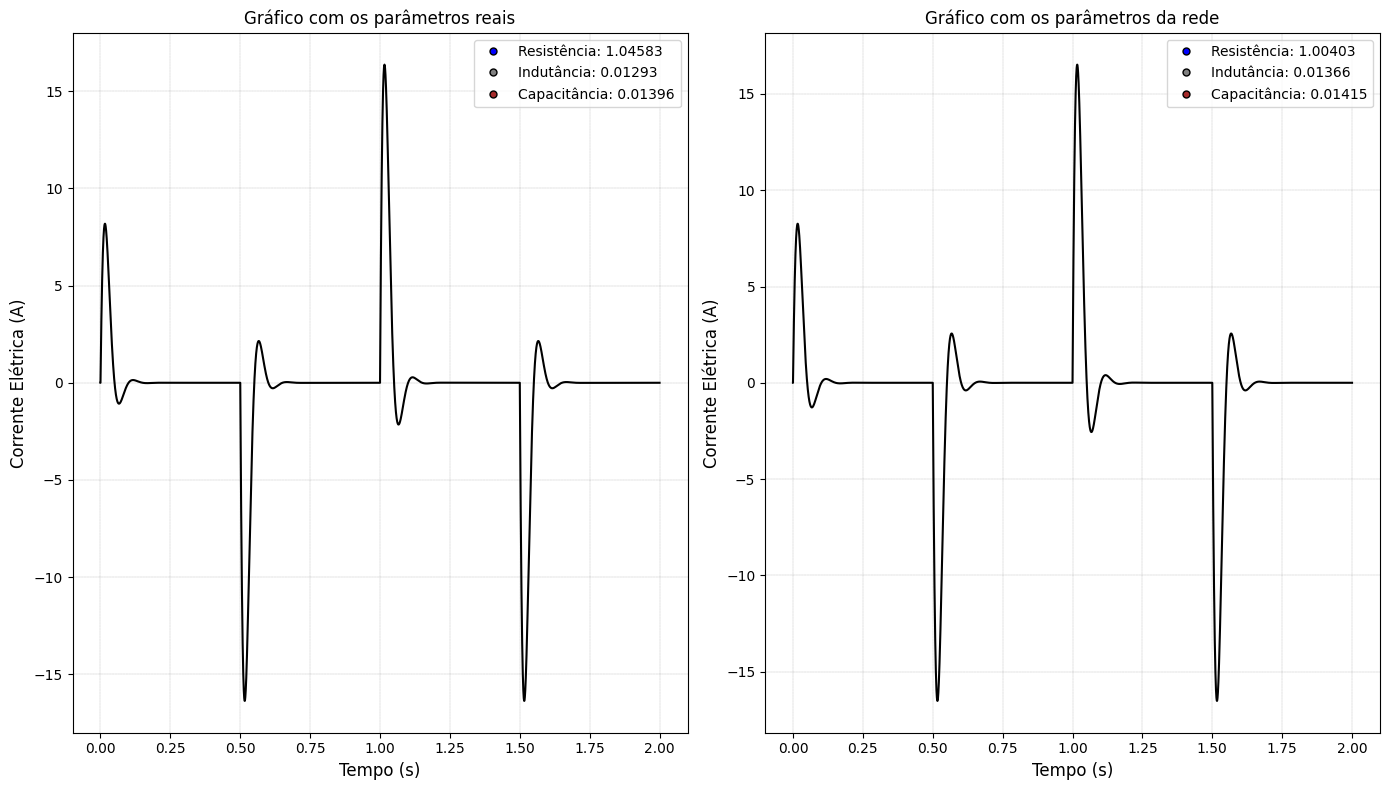

Figura: 21


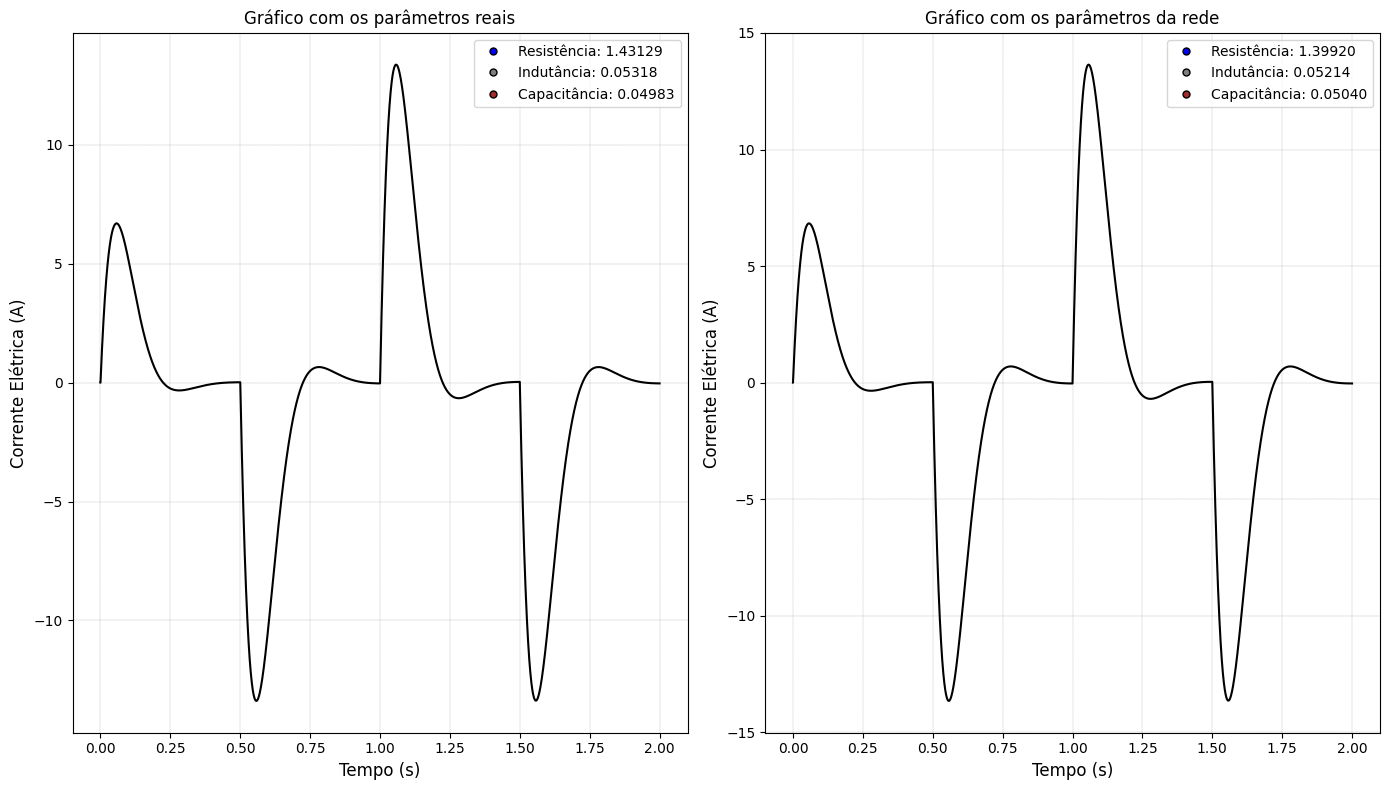

Figura: 22


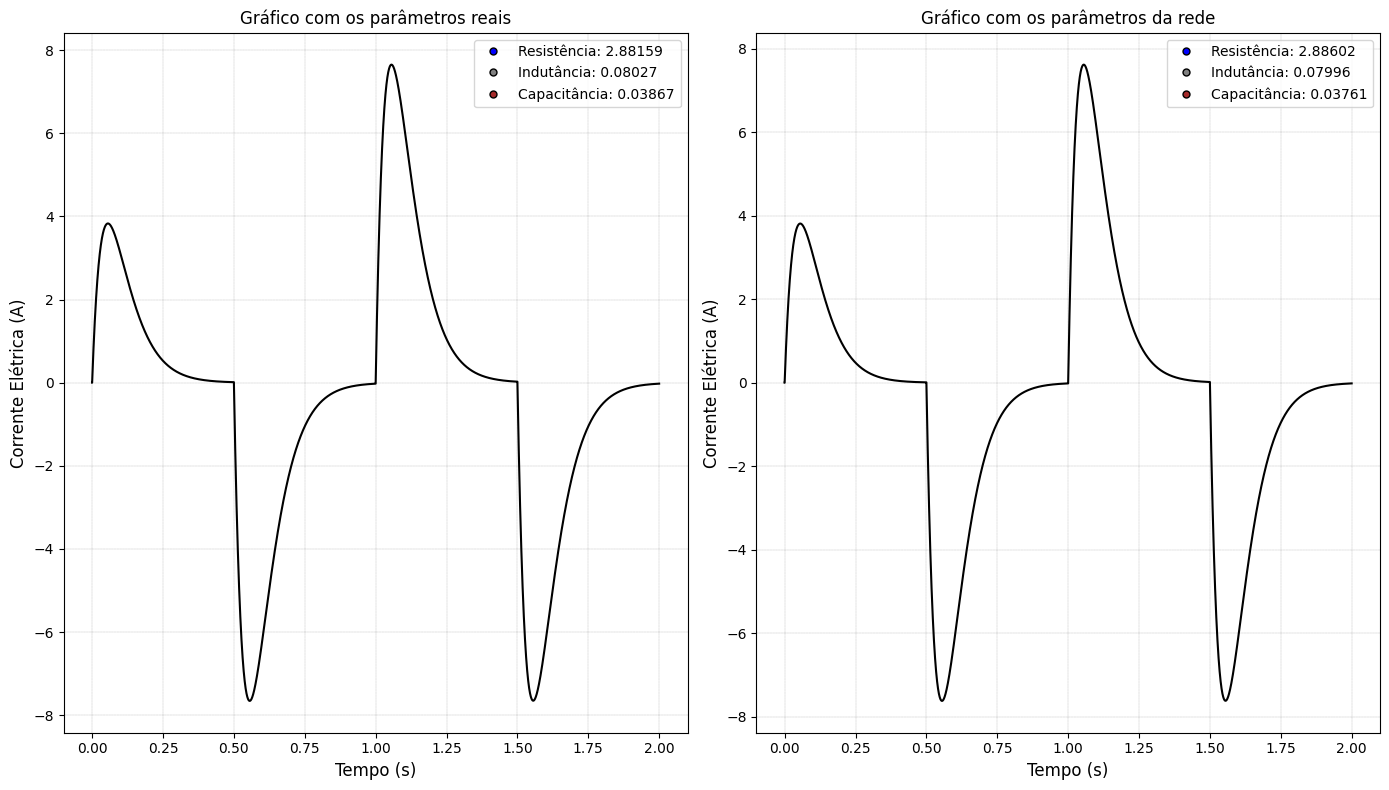

Figura: 23


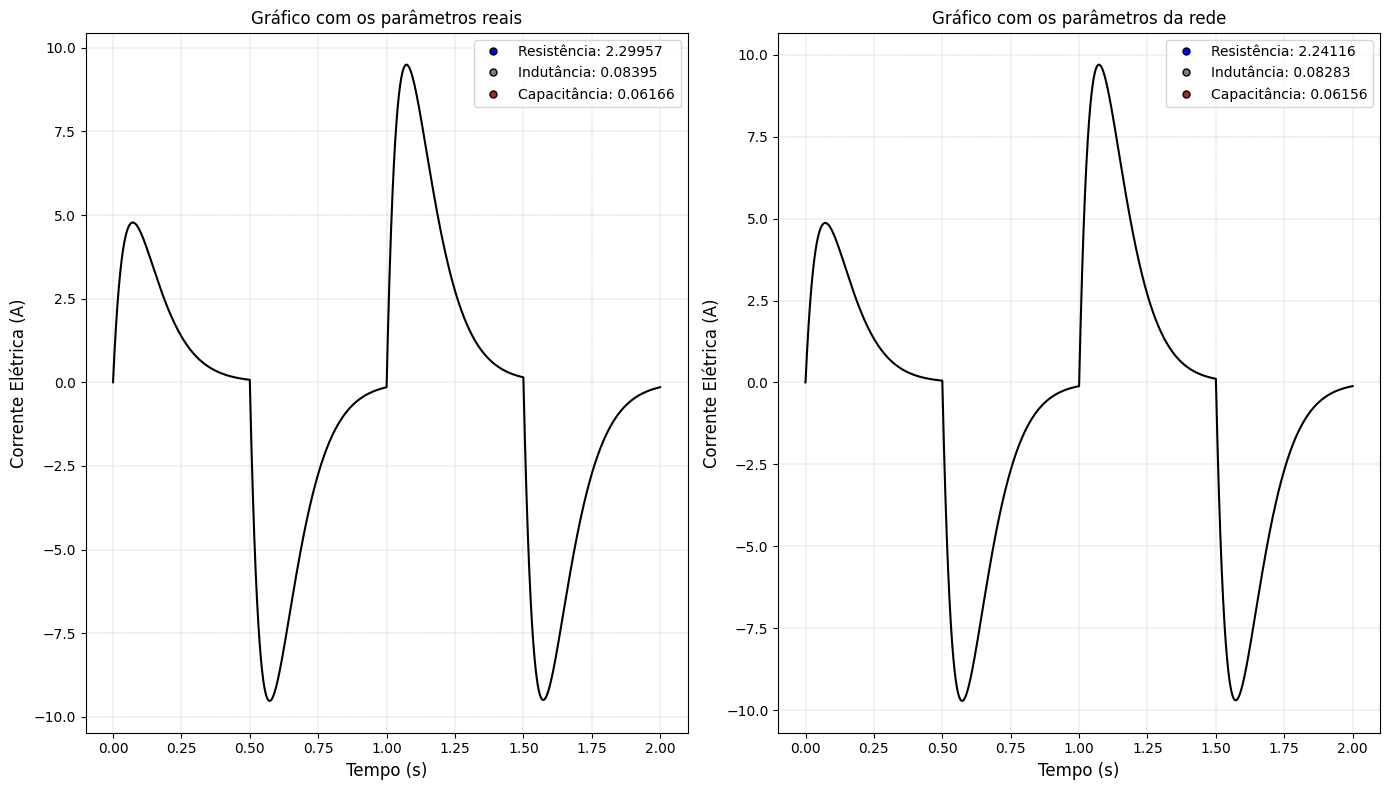

Figura: 24


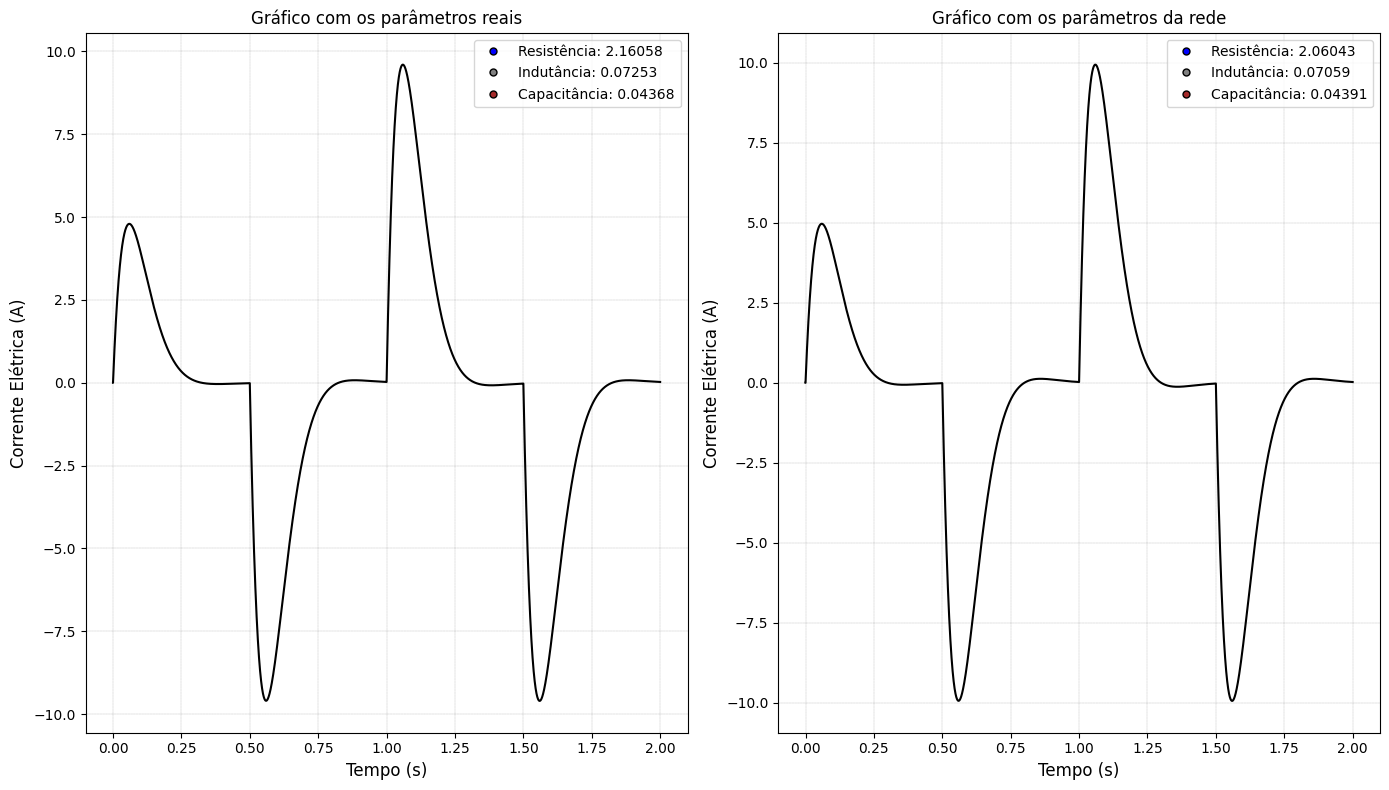

Figura: 25


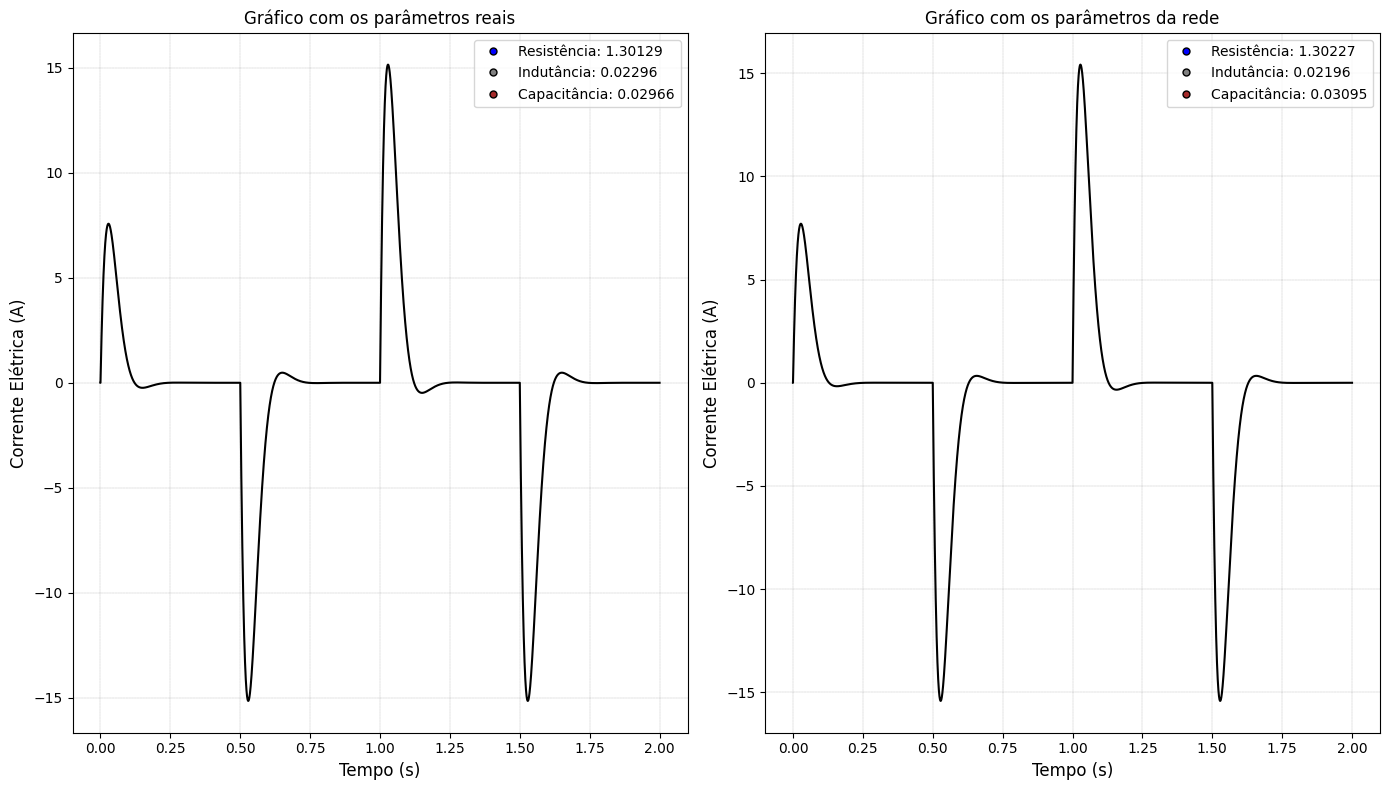

Figura: 26


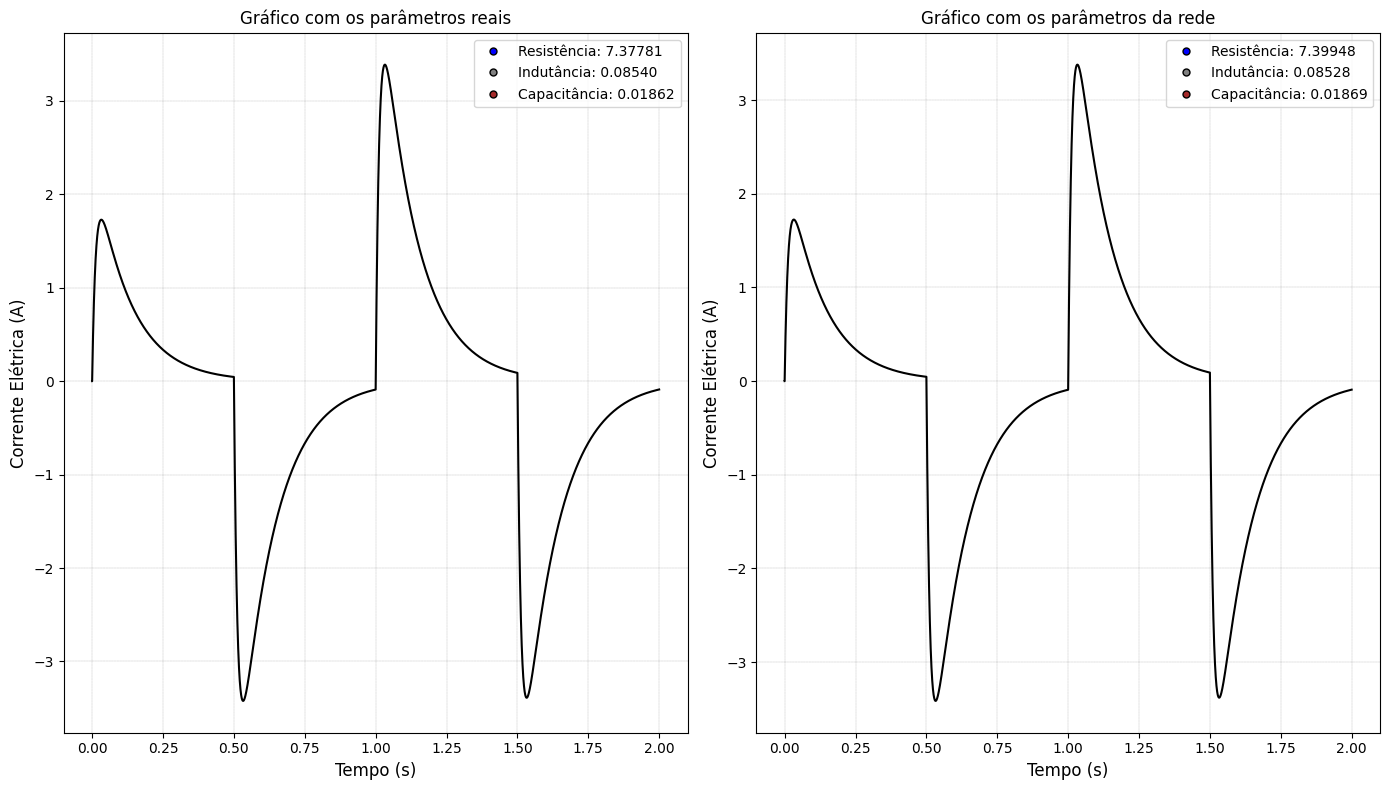

Figura: 27


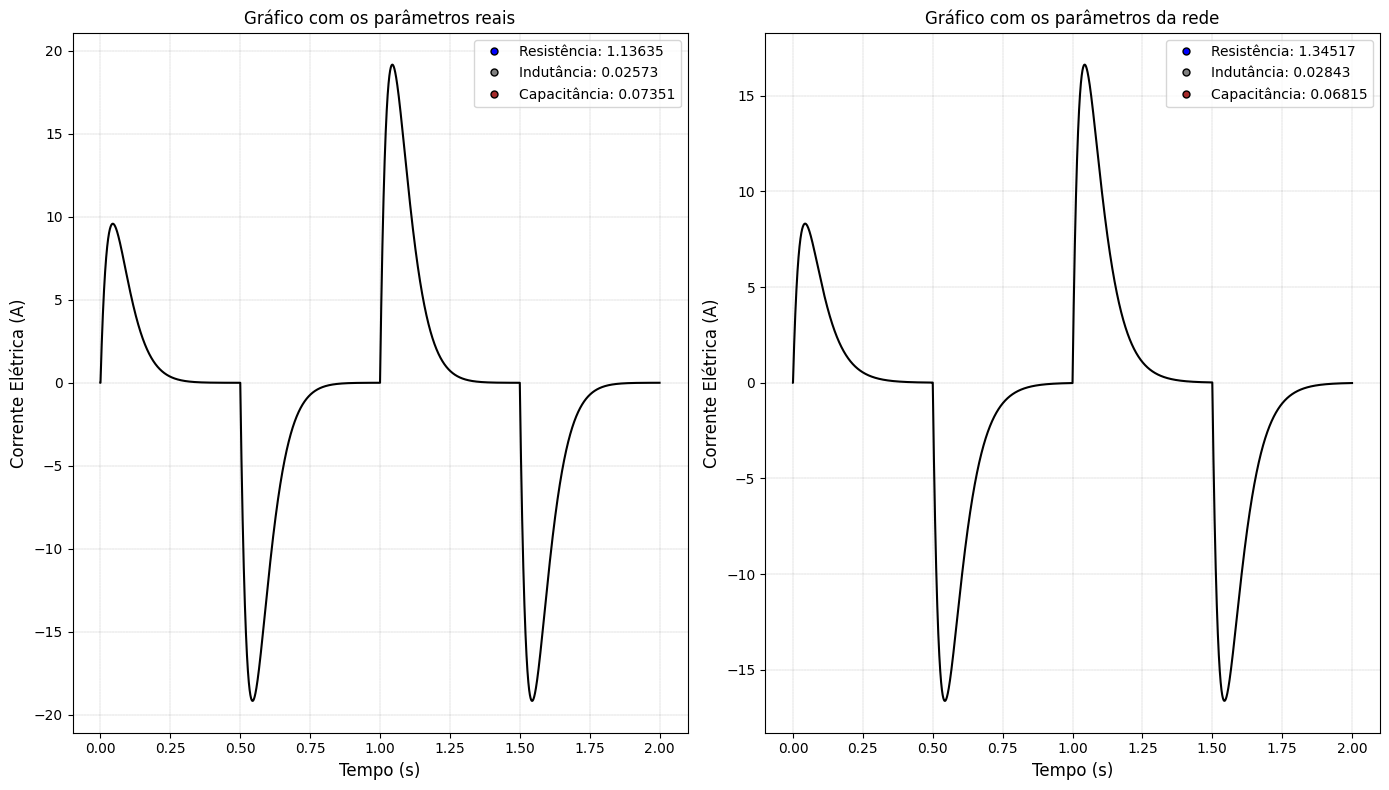

Figura: 28


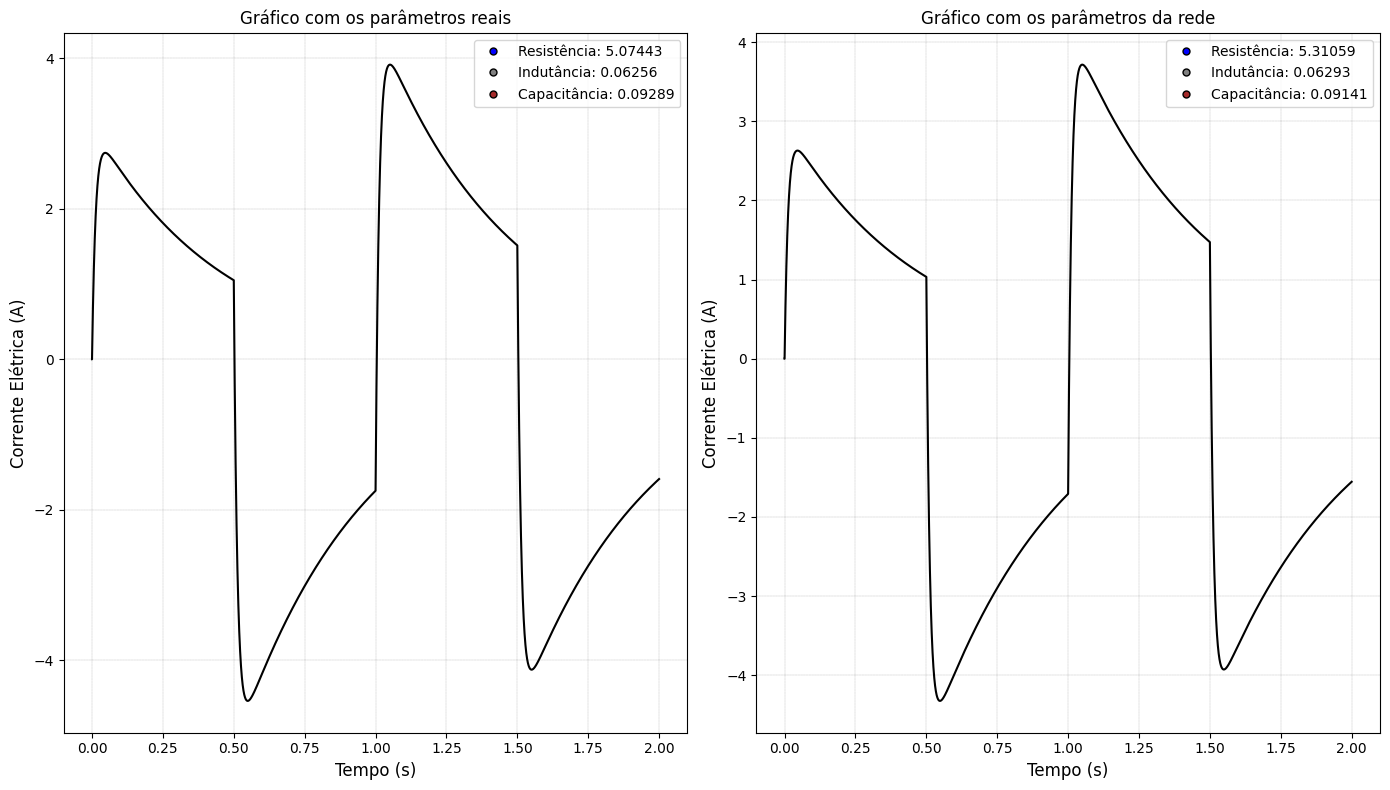

Figura: 29


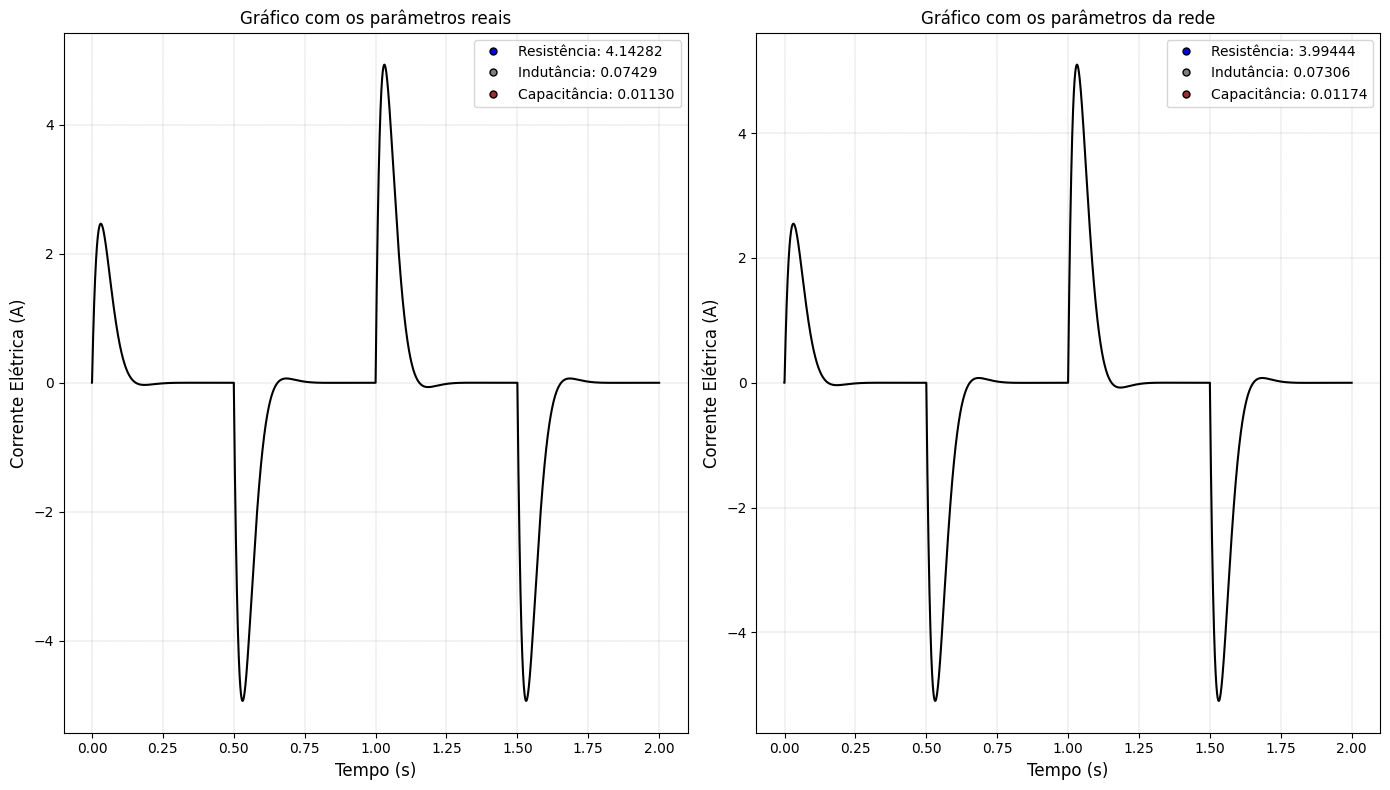

In [18]:
for i in range (30):
    print("Figura:",i)
    simulador(conjunto_teste[i,0],conjunto_teste[i,1],conjunto_teste[i,2],y_real[i,0],y_real[i,1],y_real[i,2],1)